In [1]:
import glob
import numpy as np
from pathlib import Path
from math import floor
import timeit
import os
import random
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import auc, precision_recall_curve                                                  


# Define data directories
DCA_ER_dir = '/data/cresswellclayec/DCA_ER' # Set DCA_ER directory
biowulf_dir = '%s/biowulf_full' % DCA_ER_dir
processed_data_dir = "%s/protein_data/data_processing_output/" % biowulf_dir

pdb_path = "/data/cresswellclayec/DCA_ER/biowulf_full/protein_data/metrics"
data_path = "/data/cresswellclayec/DCA_ER/biowulf_full/protein_data/data_processing_output"
metric_dir = "/data/cresswellclayec/DCA_ER/biowulf_full/protein_data/metrics"


ER_tprs = []
ER_fprs = []
PMF_tprs = []
PMF_fprs = []
PLM_tprs = []
PLM_fprs = []
MF_tprs = []
MF_fprs = []

ks_compares = []
mc = []
ER_bootstrap_aucs = []

MSA_sizes = []
# # Get list of files from completed TP files
# tp_files = list(Path(pdb_path).rglob("*PLM_tp.npy"))
# tp_files_str = [str(os.path.basename(path)) for path in tp_files]
# pfam_ids = [tp_str[5:12] for tp_str in tp_files_str] 
# pdb_ids = [tp_str[:4] for tp_str in tp_files_str] 

file_end = '_uni.npy'
file_end = '_uni_ld5.npy'
file_end = '.npy'

# Get list of files from completed auc-bootstrap files
boot_auc_files = list(Path(pdb_path).rglob("*bootstrap_aucs.npy"))
boot_auc_files_str = [str(os.path.basename(path)) for path in boot_auc_files]
pfam_ids = [tp_str[:7] for tp_str in boot_auc_files_str] 
pdb_ids = [tp_str[8:12] for tp_str in boot_auc_files_str] 
effective_seqs = []
print(pfam_ids[:10])
for i, pdb_id in enumerate(pdb_ids):
    pfam_id = pfam_ids[i]
    try:
        ER_fp_file = "%s/%s_%s_ER_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        ER_tp_file = "%s/%s_%s_ER_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        ER_fp = np.load(ER_fp_file)
        ER_tp = np.load(ER_tp_file)
        
        PMF_fp_file = "%s/%s_%s_PMF_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PMF_tp_file = "%s/%s_%s_PMF_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PMF_fp = np.load(PMF_fp_file)
        PMF_tp = np.load(PMF_tp_file)
        
        PLM_fp_file = "%s/%s_%s_PLM_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PLM_tp_file = "%s/%s_%s_PLM_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PLM_fp = np.load(PLM_fp_file)
        PLM_tp = np.load(PLM_tp_file)
        
        MF_fp_file = "%s/%s_%s_MF_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        MF_tp_file = "%s/%s_%s_MF_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        MF_fp = np.load(MF_fp_file)
        MF_tp = np.load(MF_tp_file)   
        
        ER_bootstrap_file = "%s/%s_%s_bootstrap_aucs.npy" % (pdb_path, pfam_id, pdb_id)
        ER_bootstrap = np.load(ER_bootstrap_file)
        
        MSA_file = "%s/%s_%s_preproc_msa.npy" % (data_path, pfam_id, pdb_id)
        MSA = np.load(MSA_file)
        
        pfam_dimensions_file = "%s%s_%s_pfam_dimensions.npy" % (processed_data_dir, pdb_id, pfam_id)
        pfam_dimensions = np.load(pfam_dimensions_file)

        ks_file = "%s/%s_%s_ks.pkl" % (pdb_path, pdb_id, pfam_id)
        with open(ks_file, "rb") as f:
            ks = pickle.load(f)
        f.close()
        
        compare_file = "%s/%s_%s_method_comparison.pkl" % (pdb_path, pdb_id, pfam_id)
        with open(compare_file, "rb") as f:
            comparison = pickle.load(f)
        f.close()

    except(FileNotFoundError):
        continue
    PMF_fprs.append(PMF_fp)
    PMF_tprs.append(PMF_tp)
    MF_fprs.append(MF_fp)
    MF_tprs.append(MF_tp)
    ER_fprs.append(ER_fp)
    ER_tprs.append(ER_tp)
    PLM_fprs.append(PLM_fp)
    PLM_tprs.append(PLM_tp)
    
    ks_compares.append(ks)
    mc.append(comparison)
    
    ER_bootstrap_aucs.append(ER_bootstrap)
    MSA_sizes.append(MSA.shape)
    if len(pfam_dimensions)==7:
        [n_col, n_seq, m_eff, ct_ER, ct_MF, ct_PMF, ct_PLM] = pfam_dimensions
    elif len(pfam_dimensions)==3:
        [n_col, n_seq, m_eff] = pfam_dimensions
    effective_seqs.append(m_eff)

print(len(pfam_ids), ' Pfams plotted')

['PF00303', 'PF06815', 'PF02670', 'PF00061', 'PF01564', 'PF00567', 'PF01433', 'PF00241', 'PF00190', 'PF00509']
6541  Pfams plotted


# Plotting all ROC curves

[0.         0.01616665 0.01616665 ... 0.99974053 0.99974128 0.99974179]
[0.00000000e+00 4.90234528e-06 5.91103887e-06 ... 9.99901555e-01
 9.99912296e-01 1.00000000e+00]


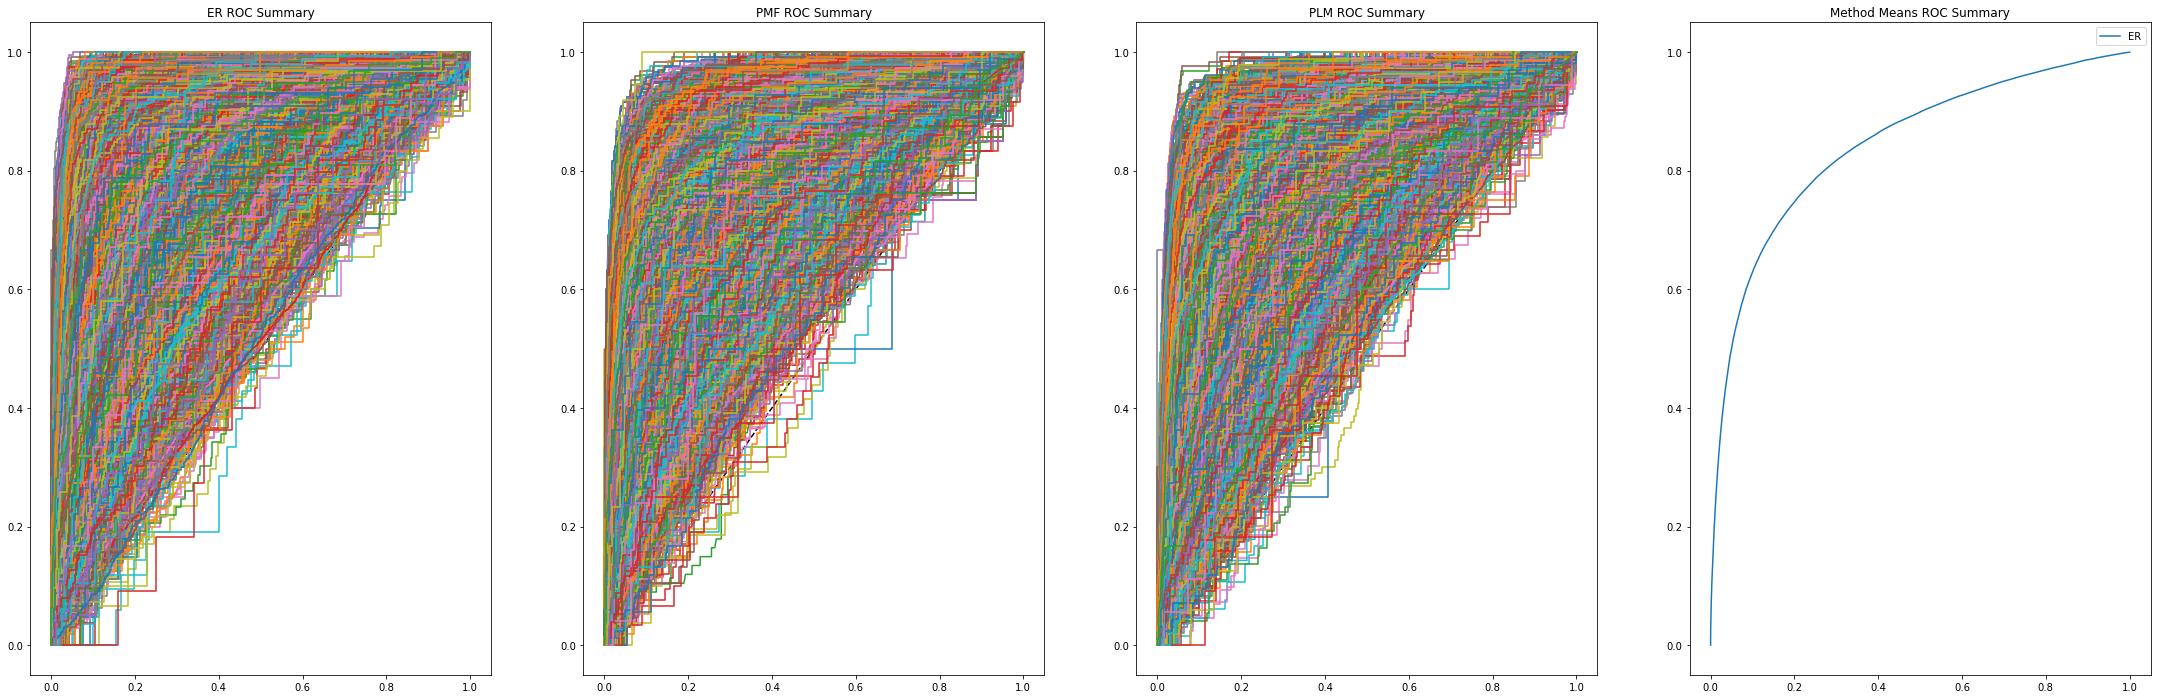

In [2]:
# method_tprs = [ER_tprs, PMF_tprs, PLM_tprs, MF_tprs]
# method_fprs = [ER_fprs, PMF_fprs, PLM_fprs, MF_fprs]
# method_label = ['ER', 'PMF', 'PLM', 'MF']

method_tprs = [ER_tprs, PMF_tprs, PLM_tprs]
method_fprs = [ER_fprs, PMF_fprs, PLM_fprs]
method_label = ['ER', 'PMF', 'PLM']
method_color = 'brg'
plt.figure(figsize=(38.0,12))
method_aucs = []
for i, method_tpr_data in enumerate(method_tprs):
    method_fpr_data = method_fprs[i]
    method_aucs.append([])
    # Initalize ROC-curve tile
    plt.subplot2grid((1,4),(0,i))
    plt.title('%s ROC Summary' % method_label[i])
    plt.plot([0,1],[0,1],'k--')

    for j, tpr in enumerate(method_tpr_data):

        fpr = method_fpr_data[j]
        method_aucs[-1].append(auc(fpr,tpr))
        try:
            plt.plot(fpr, tpr)
        except:
            pass
plt.subplot2grid((1,4),(0,3))
plt.title('Method Means ROC Summary')
# plt.plot([0,1],[0,1],'k--')

for i, method in enumerate(method_label[:1]):
    avg_fpr = np.load('%s/%s_avg_fpr.npy' % (metric_dir, method))
    avg_tpr = np.load('%s/%s_avg_tpr.npy' % (metric_dir, method))
    print(avg_tpr)
    print(avg_fpr)
    plt.plot(avg_fpr, avg_tpr, label=method)
plt.legend()
plt.show()

# Histogram of AUC values

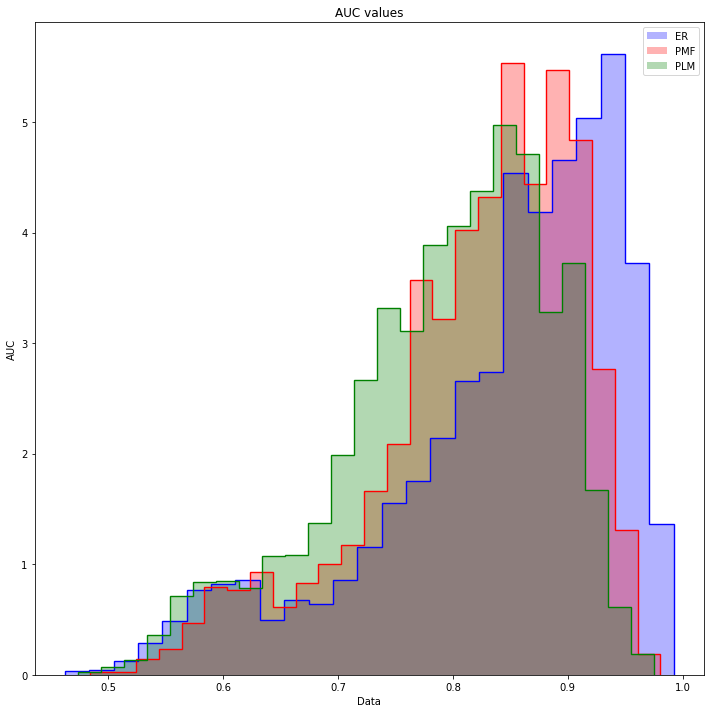

In [3]:
# bin AUC values for each method
plt.figure(figsize=(12.0,12))


for i, method_auc in enumerate(method_aucs):
    method = method_label[i]
    plt.hist(method_auc, density=True, bins=25, alpha=.3, label = method, color=method_color[i])  # density=False would make counts
    plt.hist(method_auc, density=True, bins=25, histtype='step', color=method_color[i], linewidth=1.4)  # density=False would make counts

plt.legend()
plt.title('AUC values')
plt.ylabel('AUC')
plt.xlabel('Data');
plt.show()


# Which Method is Best

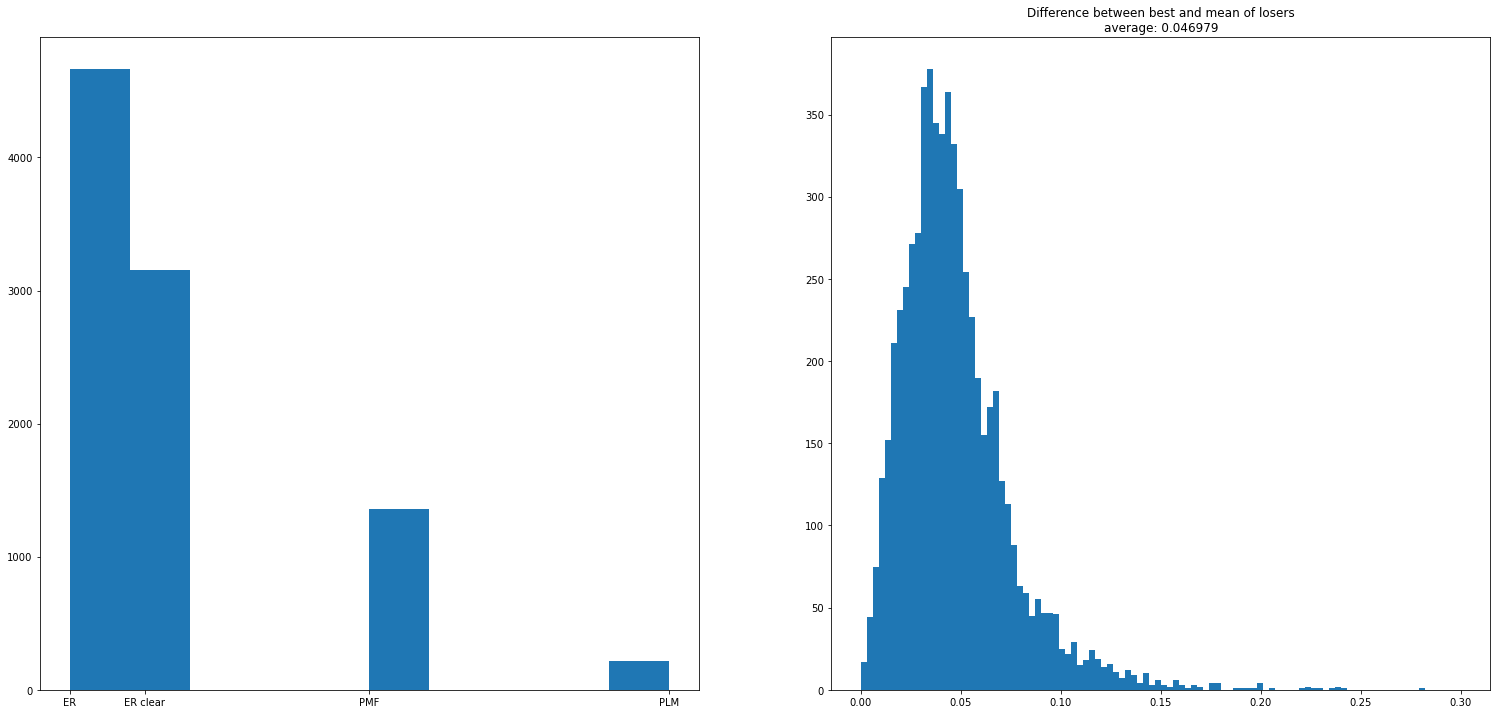

In [4]:
# plot best Method
max_auc_indices = []
max_aucs = []
auc_differences = []
for i, er_auc in enumerate(method_aucs[0]):
    pmf_auc = method_aucs[1][i]
    plm_auc = method_aucs[2][i]
    auc_compare = [er_auc, pmf_auc, plm_auc]
    max_auc = max(auc_compare)
    max_aucs.append(max_auc)
    max_auc_index = auc_compare.index(max_auc)
    max_auc_indices.append(max_auc_index)
    auc_differences.append(abs(max_auc - np.mean([auc for auc in auc_compare if auc!=max_auc])))
    
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(ER_bootstrap_aucs[i], p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(ER_bootstrap_aucs[i], p))
    #print('ER auc =%f PLM auc=%f PMF auc=%f\n%.1f confidence interval %.1f%% and %.1f%%' % 
    #      (er_auc, plm_auc, pmf_auc, alpha*100, lower*100, upper*100))
    if max_auc_index == 0 and np.mean([auc for auc in auc_compare if auc!=max_auc]) < lower:
        max_auc_indices.append(.25)


plt.figure(figsize=(26.0,12))
ax = plt.subplot2grid((1,2),(0,0))
ax.hist(max_auc_indices ,range=(0,2) )  # density=False would make counts
ax.set_xticks([0,.25,1,2])
ax.set_xticklabels(['ER', 'ER clear', 'PMF', 'PLM'])
plt.subplot2grid((1,2), (0,1))
plt.hist(auc_differences, bins = 100, range=(0,.3))  # density=False would make counts
plt.title('Difference between best and mean of losers\naverage: %f' % np.mean(auc_differences))
plt.show()



# Binning By Column Length

;6243, 9400, 6243
[(11.0, 53.22222222222222), (53.22222222222222, 95.44444444444444), (95.44444444444444, 137.66666666666666), (137.66666666666666, 179.88888888888889), (179.88888888888889, 222.11111111111111), (222.11111111111111, 264.3333333333333), (264.3333333333333, 306.55555555555554), (306.55555555555554, 348.77777777777777), (348.77777777777777, 391.0)]


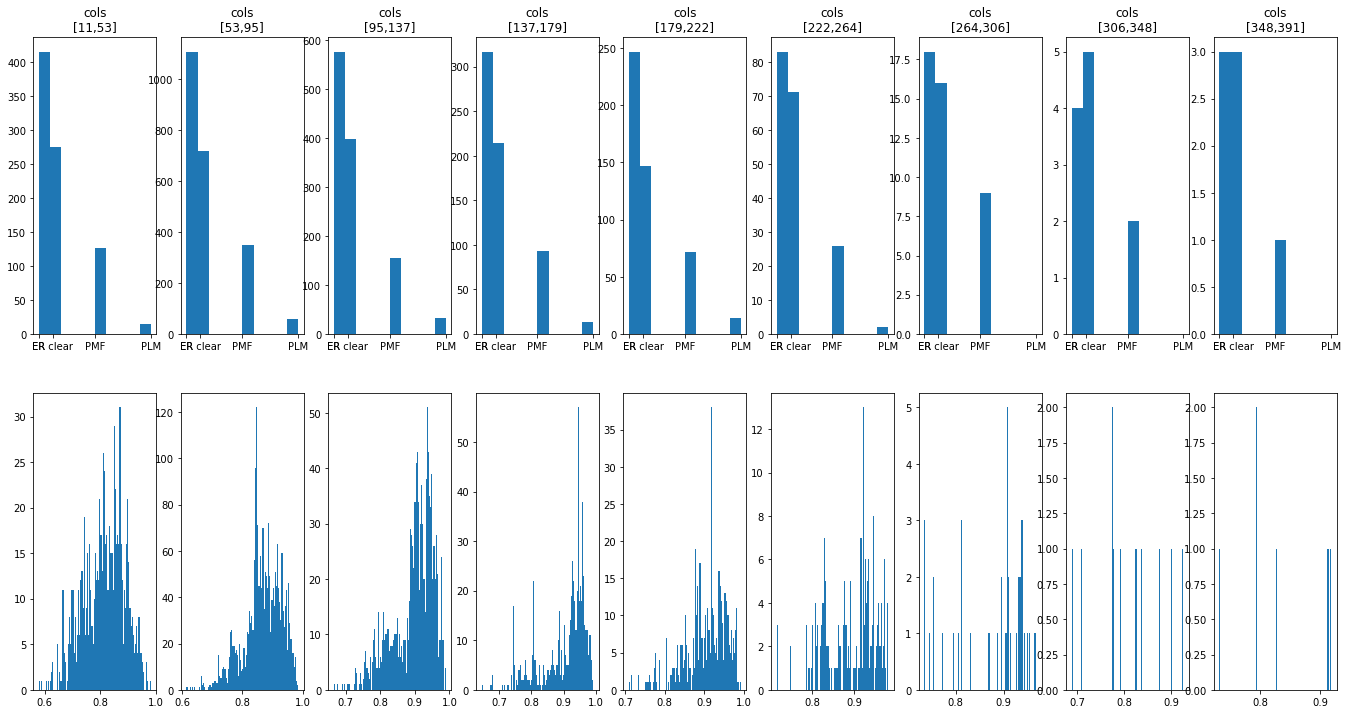

In [5]:
def bin_by(aucs, max_aucs, shapes, metric_label='cols', n_bins=5):
    n_bins = 10
    
    # set up bins
    binned_auc = []
    binned_method = []
    binned_range = []
    for i in range(n_bins):
        binned_auc.append([])
        binned_method.append([])

    # clear values with not enough sequences.
    bad_indices = []
    for i, msa_shape in enumerate(shapes):
        if msa_shape[0] < 300:
            # print('%d seqs not enough' % msa_shape[0])
            bad_indices.append(i)
    bad_indices = sorted(bad_indices, reverse=True)
    for idx in bad_indices:
        if idx < len(shapes):
            shapes.pop(idx)
            aucs.pop(idx)
            max_aucs.pop(idx)
            
    # set up metric
    if metric_label=='cols':
        metric = [msa_shape[1] for msa_shape in shapes]
    elif metric_label=='num_seq':
        metric = [msa_shape[0] for msa_shape in shapes]
    

    # bin metric values
    if metric_label=='cols':
        bins = np.linspace(min(metric), max(metric), num=n_bins)
    elif metric_label=='num_seq':
        print(min(metric), max(metric))
        bins = np.geomspace(min(metric), max(metric), num=n_bins)

    for i, auc in enumerate(aucs):
        for j, (lower, upper) in enumerate(zip(bins, bins[1:])):
            if i==0:
                binned_range.append((lower,upper))
            if metric[i] >= lower and metric[i] <= upper:
                binned_auc[j].append(auc)
                binned_method[j].append(max_aucs[i])
    return binned_auc, binned_method, binned_range



print(';%d, %d, %d' % (len(max_aucs), len(max_auc_indices), len(MSA_sizes)))
binned_auc, binned_method, binned_range = bin_by(max_aucs, max_auc_indices, MSA_sizes, metric_label='cols', n_bins=5)  
print(binned_range)

plt.figure(figsize=(26.0,12))
for i, auc_bin in enumerate(binned_auc[:-1]):
    method_bin = binned_method[i]
    
    ax = plt.subplot2grid((2,len(binned_auc)), (0,i))
    ax.hist(method_bin ,range=(0,2) )  # density=False would make counts
    ax.set_xticks([0,.25,1,2])
    ax.set_xticklabels(['ER', 'ER clear', 'PMF', 'PLM'])
    ax.set_title('%s\n[%d,%d]' %('cols', binned_range[i][0], binned_range[i][1]))
    plt.subplot2grid((2,len(binned_auc)),(1,i))
    plt.hist(auc_bin, bins = 100)  # density=False would make counts
plt.show()

300 90979
[(300.0, 566.0815779906886), (566.0815779906886, 1068.1611764680922), (1068.1611764680922, 2015.5545477448263), (2015.5545477448263, 3803.227663045662), (3803.227663045662, 7176.4570565157555), (7176.4570565157555, 13541.533783116167), (13541.533783116167, 25552.0427078687), (25552.0427078687, 48215.135523185876), (48215.135523185876, 90979.0)]


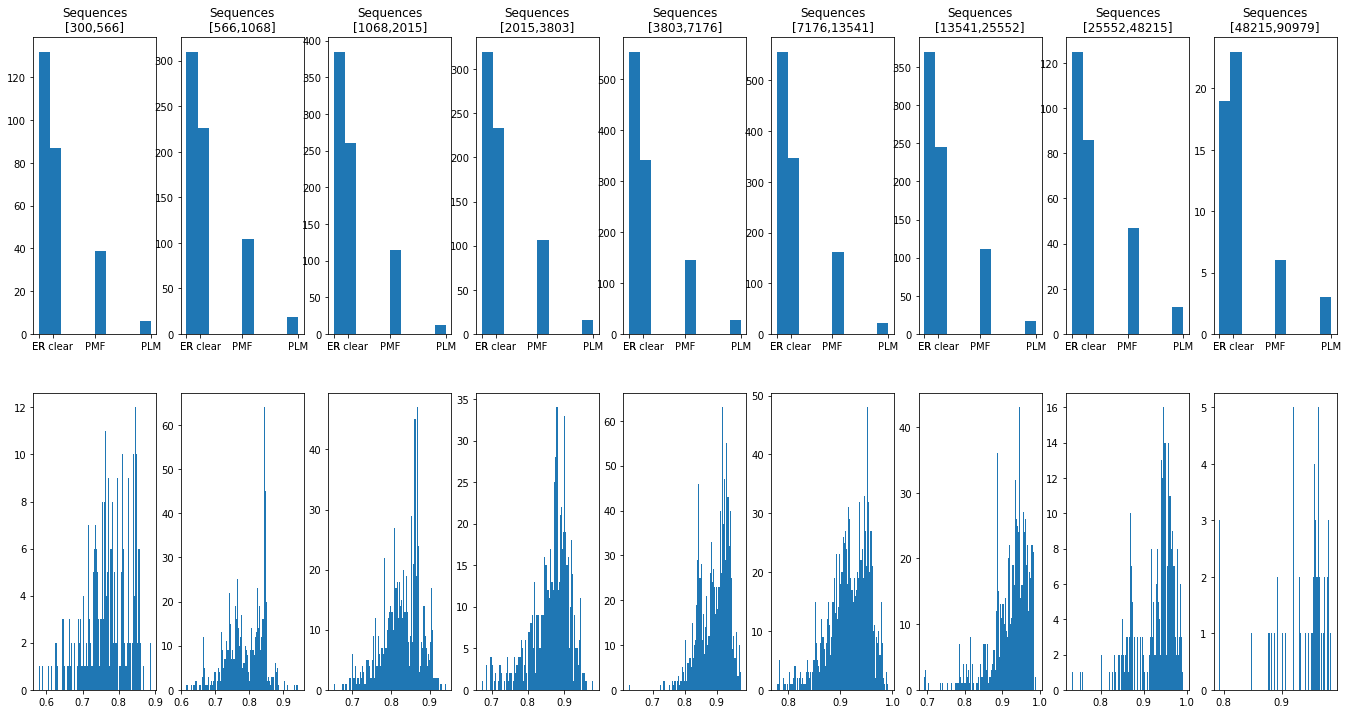

In [6]:
    
binned_auc, binned_method, binned_range = bin_by(max_aucs, max_auc_indices, MSA_sizes, metric_label='num_seq', n_bins=5)  
print(binned_range)

plt.figure(figsize=(26.0,12))
for i, auc_bin in enumerate(binned_auc[:-1]):
    method_bin = binned_method[i]
    
    ax = plt.subplot2grid((2,len(binned_auc)), (0,i))
    ax.hist(method_bin ,range=(0,2) )  # density=False would make counts
    ax.set_xticks([0,.25,1,2])
    ax.set_xticklabels(['ER', 'ER clear', 'PMF', 'PLM'])
    ax.set_title('%s\n[%d,%d]' %('Sequences', binned_range[i][0], binned_range[i][1]))
    plt.subplot2grid((2,len(binned_auc)),(1,i))
    plt.hist(auc_bin, bins = 100)  # density=False would make counts
plt.show()

In [7]:
import pandas as pd
import seaborn as sns
def gen_auc_df(aucs, max_aucs, shapes, pdb_ids, pfam_ids):
    cols = [msa_shape[1] for msa_shape in shapes]
    seqs = [msa_shape[0] for msa_shape in shapes]
    best_method = []
    for x in max_aucs:
        if x==0:
            best_method.append('ER')
        elif x==1:
            best_method.append('PMF')
        elif x==2:
            best_method.append('PLM')
    zipped = list(zip(aucs, best_method, seqs, effective_seqs, cols, pdb_ids, pfam_ids))
    df_labels = ['AUC', 'Best Method', '# Sequences', 'Effective Sequence #', '# Positions', 'PDB ID', 'Pfam ID']
    df = pd.DataFrame(zipped, columns=df_labels)
    return df

auc_df = gen_auc_df(max_aucs, max_auc_indices, MSA_sizes, pdb_ids, pfam_ids)



In [8]:
print(auc_df[auc_df.AUC==auc_df.AUC.max()])

           AUC Best Method  # Sequences  Effective Sequence #  # Positions  \
3428  0.992115          ER        13007            217.547222          209   

     PDB ID  Pfam ID  
3428   1bzp  PF00042  


In [9]:
from joblib import Parallel, delayed
def get_tp_val(fp_val, fpr, tpr):
    for i, fp in enumerate(fpr):
        if fp < fp_val:
            continue
        elif fp == fp_val:
            return tpr[i]
        elif tpr[i] == tpr[i-1]:
            return tpr[i]
        if i > 0:
            d = np.sqrt(abs(fp - fpr[i-1])**2 + abs(tpr[i]-tpr[i-1])**2)
            avg_p = abs(fp_val-fpr[i-1])/d
            tp_val = tpr[i-1] + avg_p * abs(tpr[i]-tpr[i-1])
        else:
            d = np.sqrt(abs(fp - 0)**2 + abs(tpr[i]-0)**2)
            avg_p = fp_val/d
            tp_val = avg_p * tpr[i]
        return tp_val

def get_full_length_tpr(fprs, tprs, full_fpr, i):
    tpr = [get_tp_val(fp_val, fprs[i], tprs[i]) for fp_val in full_fpr]
    print('%d tpr full: ' % i,  len(tpr))
    return tpr

def get_average_roc(tprs, fprs):
    average_fpr = fprs[0]
    print(len(average_fpr))
    # fill average fpr with all
    for i, fpr in enumerate(fprs[1:]):
        average_fpr = np.unique(np.sort(np.concatenate((average_fpr, fpr))))
    print(len(average_fpr))

    average_tpr = np.zeros(len(average_fpr))
    tprs_full = Parallel(n_jobs = 14)(delayed(get_full_length_tpr)(fprs, tprs, average_fpr, i) for i in range(len(fprs)))
    for i, fpr in enumerate(fprs):
        average_tpr = np.add(np.array(tprs_full[i]), average_tpr)
        #plt.plot(fprs[i], tprs[i])
    average_tpr = average_tpr / len(fprs)
    #plt.plot(average_fpr, average_tpr, lw=2.5)
    return average_fpr, average_tpr, tprs_full


# KS Comparison

In [10]:
# plot best Method
from itertools import combinations

method_combos =['%svs%s' % combo for combo in combinations(method_label, 2)]
ks_vals = {}
p_vals = {}

# asymptotic ks test, and z test run_from method_comparison.py
ks_vals_asympt = {}
p_vals_asympt = {}
z = {}
for ks_combo in ks_compares[0].keys():
    ks_vals[ks_combo] = []
    p_vals[ks_combo] = []
    ks_vals_asympt[ks_combo] = []
    p_vals_asympt[ks_combo] = []
    z[ks_combo] = []
print(ks_compares[0])
    
ER_combos = [combo for combo in method_combos if "ER" in combo]
PLM_combos = [combo for combo in method_combos if "PLM" in combo]
PMF_combos = [combo for combo in method_combos if "ER" in combo]
ks_max = .2

max_auc_indices = []
max_aucs = []
auc_differences = []
for i, er_auc in enumerate(method_aucs[0]):
    pmf_auc = method_aucs[1][i]
    plm_auc = method_aucs[2][i]
    auc_compare = [er_auc, pmf_auc, plm_auc]
    max_auc = max(auc_compare)
    max_aucs.append(max_auc)
    max_auc_index = auc_compare.index(max_auc)
    max_auc_indices.append(max_auc_index)
    auc_differences.append(abs(max_auc - np.mean([auc for auc in auc_compare if auc!=max_auc])))
    
    ks = ks_compares[i]
    for ks_combo in ks.keys():
        print(mc[i][ks_combo][1][0][0])
        print(ks[ks_combo][0])
        try:
            ks_vals[ks_combo].append(ks[ks_combo][0])
            p_vals[ks_combo].append(ks[ks_combo][1])
            ks_vals_asympt[ks_combo].append(mc[i][ks_combo][0][0])
            p_vals_asympt[ks_combo].append(mc[i][ks_combo][0][1])

            z[ks_combo].append(mc[i][ks_combo][1][0][0])
        except(IndexError):
            continue


    
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(ER_bootstrap_aucs[i], p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(ER_bootstrap_aucs[i], p))
    #print('ER auc =%f PLM auc=%f PMF auc=%f\n%.1f confidence interval %.1f%% and %.1f%%' % 
    #      (er_auc, plm_auc, pmf_auc, alpha*100, lower*100, upper*100))

    if max_auc_index == 0 and np.mean([ks[combo][0] for combo in ER_combos]) <= ks_max:
        max_auc_indices.append(.25)
    if max_auc_index == 1 and np.mean([ks[combo][0] for combo in PMF_combos]) <= ks_max:
        max_auc_indices.append(1.25)
    if max_auc_index == 2 and np.mean([ks[combo][0] for combo in PLM_combos]) <= ks_max:
        max_auc_indices.append(2.25)
print(ks_vals)
print(z)

{'ERvsPMF': (0.18382352941176472, 0.00019679676289925972), 'ERvsPLM': (0.48161764705882354, 6.108179175885149e-29), 'ERvsMF': (0.125, 0.028435175083603294), 'PMFvsPLM': (0.34558823529411764, 8.41895896227187e-15), 'PMFvsMF': (0.17279411764705882, 0.0005791531641115404), 'PLMvsMF': (0.49264705882352944, 2.522965400658655e-30)}
-5.8816311598150985
0.18382352941176472
-15.63366734048842
0.48161764705882354
-2.2800082388323224
0.125
-10.720973820536717
0.34558823529411764
-2.4677292641153814
0.17279411764705882
-9.397156180458188
0.49264705882352944
-0.01762556133630927
0.24210526315789474
-0.15944999143549027
0.11578947368421053
-0.1673603418973315
0.28421052631578947
-0.1301588231832408
0.28421052631578947
-0.40120244515448805
0.18947368421052632
-0.01391258629020331
0.23157894736842105
-4.390945452621674
0.09034267912772585
-7.631586688468765
0.18691588785046728
-0.607605290985467
0.09968847352024922
-3.201922266820985
0.11214953271028037
-3.9641528378554574
0.12461059190031153
-6.80009

-4.4060389085920635
0.18072289156626506
-2.062423444836468
0.13253012048192772
-7.846265373556076
0.24096385542168675
-0.7711899225516254
0.12048192771084337
-0.8297405613055855
0.0963855421686747
-1.1085609384592048
0.14457831325301204
-1.231123059820892
0.1774891774891775
-2.084453939191482
0.1774891774891775
-1.1274350664021853
0.20346320346320346
-0.11974587844143103
0.21645021645021645
-0.03965470439577401
0.12121212121212122
-0.12902435281739688
0.24242424242424243
-0.5802114734208896
0.13793103448275862
-1.1843931622617587
0.13793103448275862
-0.5067637375971836
0.16379310344827586
-0.6499344326784284
0.1724137931034483
-0.007918288940375995
0.1896551724137931
-0.5582048197177234
0.1810344827586207
-2.089159298883338
0.1519434628975265
-10.410235590095695
0.2756183745583039
-0.030086998619358596
0.1625441696113074
-9.16916352731484
0.2332155477031802
-2.3918159692297807
0.1519434628975265
-10.1362931098378
0.2332155477031802
-7.027827097119493
0.133630289532294
-14.9448525592103

-3.835467880308978
0.18064516129032257
-1.2516626530613573
0.0967741935483871
-6.40376584906815
0.1935483870967742
-0.6263825144463455
0.12903225806451613
-0.7585050754118843
0.08387096774193549
-0.9174195427862766
0.14838709677419354
-0.7541858521853455
0.0967741935483871
-0.5101862259223899
0.08064516129032258
-0.06295483027432353
0.0967741935483871
-0.3051731027594084
0.0967741935483871
-2.7723003691782635
0.06451612903225806
-0.3891014396516606
0.0967741935483871
-0.8326700762733341
0.3063063063063063
-0.4632786186321966
0.21621621621621623
-1.6517818157283788
0.3063063063063063
-0.4632741244906243
0.18018018018018017
-0.12075448196579747
0.15315315315315314
-0.42686026382125225
0.21621621621621623
-3.1788974569603656
0.10309278350515463
-4.150515412338823
0.08247422680412371
-4.019911903238259
0.15206185567010308
-0.6979734320672235
0.10309278350515463
-0.059923223055205754
0.11082474226804123
-0.50813643950651
0.12886597938144329
-1.819007495015085
0.10903426791277258
-7.78414092

-0.06800089723861452
0.13043478260869565
-1.7302252919719936
0.13043478260869565
-0.5717720672845163
0.20735785953177258
-2.5745094210516846
0.2408026755852843
-0.8390280316740246
0.14046822742474915
-2.8083253124918133
0.29431438127090304
-1.2570247372104777
0.17647058823529413
-2.2091741715856994
0.17254901960784313
-1.2320490619102658
0.19215686274509805
-0.15042201073938832
0.21568627450980393
-0.02545507191482982
0.11764705882352941
-0.10947397085008215
0.23921568627450981
-0.9337940364782065
0.14457831325301204
-1.4848869057517866
0.3072289156626506
-0.04992867098443882
0.14457831325301204
-0.1502727062754246
0.22289156626506024
-2.6822620560536943
0.18072289156626506
-1.1202191034452957
0.3674698795180723
-1.9883269496844682
0.18385650224215247
-1.543260368168586
0.21076233183856502
-1.5771666707293348
0.19730941704035873
-0.43321810896155316
0.27802690582959644
-0.662522646930656
0.17040358744394618
-0.12291385860457427
0.27802690582959644
-9.298741755612129
0.1266540642722117


-16.104163506246255
0.1565217391304348
-5.610342046487482
0.0782608695652174
-10.951920799746246
0.17608695652173914
-5.019648333252916
0.1826086956521739
-1.3094665597490909
0.05217391304347826
-1.310569012688981
0.1891304347826087
-0.09120528008842893
0.18831168831168832
-2.871157617914731
0.19805194805194806
-0.7304737047460121
0.19805194805194806
-4.680267515022092
0.3181818181818182
-0.7986315935987325
0.06818181818181818
-3.9922488833997924
0.29545454545454547
-5.573452962655401
0.11397058823529412
-4.483848568321645
0.26838235294117646
-3.988861272674547
0.11397058823529412
-0.5278298990908703
0.2610294117647059
-2.105301986661595
0.17279411764705882
-1.243204322204335
0.2977941176470588
-1.5758095795636686
0.09278350515463918
-12.368972138763484
0.1958762886597938
-0.4163399844714924
0.1360824742268041
-6.998416883352728
0.15051546391752577
-1.6385118026321637
0.12577319587628866
-7.167097396885543
0.1979381443298969
-1.5574123621650868
0.13215859030837004
-2.736438434900119
0.

-0.734154251227287
0.11926605504587157
-0.2514707737534812
0.24770642201834864
-1.0653172894772345
0.1926605504587156
-0.009161556956482186
0.1926605504587156
-0.37553834768413424
0.10091743119266056
-0.09298694548370012
0.14678899082568808
-9.229658085401228
0.23646723646723647
-8.315876374629713
0.17094017094017094
-7.387672853232411
0.20797720797720798
-0.058183358165922405
0.11396011396011396
-2.7345796829632185
0.08262108262108261
-2.0875161736582504
0.1396011396011396
-0.4001506946235431
0.08061420345489444
-0.5212643573635938
0.0671785028790787
-0.03733748775298801
0.0671785028790787
-0.04906975750692866
0.053742802303262956
-1.4110273752751212
0.044145873320537425
-0.4426920410958431
0.04990403071017274
-2.252590238971115
0.14685314685314685
-1.6021662616098464
0.05419580419580419
-0.7649024749573707
0.15384615384615385
-0.5605976319187207
0.17657342657342656
-1.3927161794545369
0.08916083916083917
-0.4711984755908148
0.18356643356643357
-10.009782659151899
0.19240837696335078


-0.33235952027232246
0.26914660831509846
-3.3212982647509492
0.12035010940919037
-1.1504720018897514
0.27571115973741794
-3.8558036346294173
0.2975929978118162
-1.746583533170015
0.1050328227571116
-4.918082328808337
0.3063457330415755
-4.723368749831584
0.21052631578947367
-4.065349835198277
0.14912280701754385
-5.079424963554249
0.25877192982456143
-0.17166896690317435
0.16228070175438597
-0.7750976951048503
0.10964912280701754
-0.3399777199038239
0.19736842105263158
-2.901248057870198
0.2781456953642384
-2.509721457423047
0.39072847682119205
-2.1393701057703103
0.2052980132450331
-0.2973652853765982
0.26490066225165565
-0.5641642989402416
0.25165562913907286
-0.5108415692727197
0.3443708609271523
-8.718447436429999
0.18032786885245902
-33.13187911630838
0.3989071038251366
-6.915953469066379
0.16666666666666666
-18.060135017628173
0.30327868852459017
-1.8866638572380343
0.15300546448087432
-19.359251011373612
0.3551912568306011
-9.886323977295499
0.21475054229934923
-12.3208678794815

-0.6442298823593393
0.19607843137254902
-0.5460271376409018
0.09803921568627451
-1.1606265173494488
0.1568627450980392
-0.20165960049487236
0.22549019607843138
-0.18767301531631153
0.1568627450980392
-0.3984014773385541
0.22549019607843138
-0.09399767665335229
0.19230769230769232
-0.5042722163497646
0.19230769230769232
-0.12430388056879466
0.21794871794871795
-0.4872282410745779
0.1282051282051282
-0.04114416084041411
0.0641025641025641
-0.5100110289256383
0.1282051282051282
-0.04916964116251282
0.1574468085106383
-0.7005980497554365
0.26382978723404255
-0.15721604645621723
0.09787234042553192
-0.8281419435195472
0.17872340425531916
-0.3577155094523951
0.1574468085106383
-0.46920737742303903
0.225531914893617
-3.777331049839706
0.15508021390374332
-5.116253835667805
0.18716577540106952
-1.7620990076854235
0.15508021390374332
-0.8826874662067308
0.12299465240641712
-1.3692776442921986
0.10695187165775401
-2.1416200890702193
0.12299465240641712
-1.3123910450951528
0.20478325859491778
-12

-0.5346363389700524
0.08653846153846154
-0.0403659524676967
0.17307692307692307
-0.44057252340067704
0.14423076923076922
-0.5363843482638428
0.14423076923076922
-1.71632361749047
0.17307692307692307
-0.37101119512331565
0.17307692307692307
-2.8528728001978103
0.1557377049180328
-3.6913005653752884
0.16188524590163936
-0.9237274691053909
0.13114754098360656
-0.5951701204063076
0.16188524590163936
-1.470752549652309
0.10040983606557377
-1.9525247671751003
0.20901639344262296
-1.346741881191283
0.12255772646536411
-17.04319368060387
0.19538188277087035
-1.102363553039121
0.11545293072824156
-8.976644233769342
0.0994671403197158
-0.4057606902113459
0.1492007104795737
-8.879870543838328
0.22380106571936056
-2.070544899034168
0.1452991452991453
-4.074195486012681
0.18376068376068377
-1.6337386159862741
0.14102564102564102
-0.9434915742171739
0.10683760683760683
-0.14957443607111093
0.13247863247863248
-0.8361837966135071
0.15384615384615385
-0.9991714982902493
0.13934426229508196
-3.56837388

-2.2883124451336254
0.2608695652173913
-1.9988915959345115
0.3565217391304348
-0.43089078567952227
0.28695652173913044
-0.6312631799791883
0.2
-2.2702877159704586
0.2782608695652174
-1.9729024412067875
0.2608695652173913
-0.1184308978704181
0.07478632478632478
-7.656203957697328
0.24572649572649571
-0.4852969525616477
0.15598290598290598
-7.1513725304030835
0.2692307692307692
-1.0975335473500756
0.16452991452991453
-7.302027426568543
0.3803418803418803
-1.3826190371081315
0.1348314606741573
-3.1033159107351196
0.25280898876404495
-0.7474549596791715
0.28651685393258425
-0.1946206018821091
0.3707865168539326
-0.722769829984121
0.21910112359550563
-0.07978336252826346
0.4044943820224719
-0.3341833342709784
0.08666666666666667
-0.7244481701824024
0.11333333333333333
-0.41252290719224555
0.12
-0.510043436902976
0.10666666666666667
-0.18485518420869523
0.08666666666666667
-0.37366727233476144
0.06666666666666667
-0.04179428942389385
0.17478510028653296
-2.1399531331752657
0.1289398280802292

-2.1035363530849196
0.144
-5.3462166483258144
0.248
-1.3540179708915632
0.144
-0.9597358396110527
0.316
-1.2316561756459985
0.084
-1.549897951684839
0.328
-3.6793486971476583
0.1483739837398374
-6.464792448534504
0.09146341463414634
-0.3688661951546141
0.16463414634146342
-3.3972801757052484
0.19308943089430894
-3.1980303412686175
0.08536585365853659
-5.341070860782595
0.20934959349593496
-0.7984918245814681
0.38461538461538464
-1.0993893860440822
0.23076923076923078
-4.826918309769766
0.5576923076923077
-3.604740002789536
0.38461538461538464
-2.5067225729653178
0.2692307692307692
-5.513944719244247
0.5865384615384616
-2.598472883066163
0.2064676616915423
-2.335096698266276
0.19154228855721392
-2.2607001697275093
0.16417910447761194
-0.002676556039812872
0.08208955223880597
-0.5352293173878027
0.09701492537313433
-0.28563092515642224
0.11940298507462686
-2.8825504078536603
0.16333333333333333
-1.4656769734983393
0.17666666666666667
-2.173620312696778
0.16666666666666666
-0.907964925805

-6.828552393701403
0.16666666666666666
-14.914053422613332
0.17777777777777778
-6.5945919519161285
0.17777777777777778
-5.75790376239598
0.17333333333333334
-0.04232201299934513
0.07111111111111111
-4.9221821017807095
0.16666666666666666
-1.9066359439381841
0.0825515947467167
-1.2859440952295131
0.0825515947467167
-1.7225042669881865
0.06941838649155722
-0.8263808827138306
0.0825515947467167
-0.49295899573979013
0.0450281425891182
-0.45427611703016896
0.05065666041275797
-0.24822204034219214
0.17857142857142858
-1.4885913419678882
0.17063492063492064
-0.3500714976021358
0.1626984126984127
-1.7286468955039376
0.2698412698412698
-0.2010213446186166
0.08333333333333333
-1.780895189650137
0.24206349206349206
-0.1347832383671792
0.1821561338289963
-2.6949993310916645
0.22676579925650558
-0.33748336702784626
0.22676579925650558
-2.261692802588974
0.3159851301115242
-0.7017679455256436
0.07063197026022305
-2.5366457154090942
0.36059479553903345
-2.3530091517094514
0.22613065326633167
-0.62319

-5.252140747566208
0.2611683848797251
-3.159527871306167
0.18213058419243985
-6.4789070427656865
0.2852233676975945
-0.5009892921202574
0.12371134020618557
-0.15977581287511244
0.1134020618556701
-0.2817652715101758
0.18213058419243985
-6.655033825897454
0.08151382823871907
-12.484561295872902
0.16302765647743814
-2.1268247304337438
0.10771470160116449
-2.053736947484345
0.11208151382823872
-5.405093284733862
0.08151382823871907
-6.049951059983528
0.16885007278020378
-0.18584263931931783
0.08914728682170543
-0.12248001966742422
0.08914728682170543
-0.17956827093761069
0.08914728682170543
-0.3089712305055767
0.10465116279069768
-0.01646469004494744
0.05813953488372093
-0.3070570702780298
0.10465116279069768
-6.125120986959233
0.1511627906976744
-12.498030130148393
0.3372093023255814
-7.2794010370885385
0.1937984496124031
-5.760757242372778
0.22093023255813954
-0.6231238787248992
0.1124031007751938
-4.871868190535358
0.20930232558139536
-13.442206288686613
0.2802056555269923
-9.376150857

-3.1040853431280406
0.07060755336617405
-0.8891101446887109
0.05993431855500821
-1.8863413887937228
0.06814449917898194
-1.137330559684666
0.03776683087027915
-0.49421094352956113
0.04351395730706076
-0.522290189100014
0.04351395730706076
-3.3091167998133115
0.34959349593495936
-0.5485902984519369
0.18699186991869918
-3.014183608227854
0.42276422764227645
-1.917406414359319
0.3170731707317073
-0.0068201212825038104
0.11382113821138211
-1.8541450868503473
0.25203252032520324
-0.16146559590162474
0.08478260869565217
-3.45037727735977
0.11521739130434783
-0.038006765626186434
0.09347826086956522
-0.9993368469576585
0.08478260869565217
-0.8537022980373725
0.041304347826086954
-1.3317623424001481
0.1
-1.3646639726848864
0.16666666666666666
-1.1977566566611135
0.1388888888888889
-0.14460603787322224
0.25
-0.23962471913866618
0.09722222222222222
-1.4760343783956715
0.13194444444444445
-0.8353926419599556
0.11805555555555555
-0.47469593758048695
0.18556701030927836
-3.2966020525879087
0.185567

-0.42633509268682696
0.165
-0.737311399652361
0.26
-0.7449093853253805
0.19
-1.7116781022918777
0.28
-0.19885675049322454
0.11
-1.4124457114601525
0.28
-9.99555660473248
0.23003194888178913
-4.279906277131072
0.12140575079872204
-8.79777520177774
0.21405750798722045
-1.5355530974060168
0.14696485623003194
-0.028083550796300594
0.11182108626198083
-1.242535347782472
0.13738019169329074
-7.069247823856691
0.2
-4.90289169225761
0.2975609756097561
-8.127489552601773
0.23902439024390243
-0.22314072446368166
0.2146341463414634
-0.46625961155763856
0.2
-0.05019446479988188
0.2975609756097561
-6.906841108317552
0.1687344913151365
-15.386480412092665
0.26054590570719605
-5.903163456372365
0.1761786600496278
-3.4751873446186665
0.24069478908188585
-0.6525391599334252
0.10421836228287841
-3.4982250399951607
0.29528535980148884
-0.9682908713692775
0.4084507042253521
-2.9077676453812007
0.30985915492957744
-0.7354516013134669
0.3380281690140845
-0.9381776939336912
0.16901408450704225
-0.09749360674

-2.0917870631678226
0.12690355329949238
-0.7975344582500257
0.1116751269035533
-1.2095001060377
0.12690355329949238
-1.2093229236716205
0.1218274111675127
-1.4825235649047461
0.07106598984771574
-0.39353140168512696
0.14213197969543148
-1.4021591254759
0.20469798657718122
-2.9807490475641325
0.15100671140939598
-0.1315125863554098
0.2348993288590604
-1.5791108014907624
0.22483221476510068
-1.7224637171029324
0.10738255033557047
-3.177613987771498
0.25838926174496646
-4.071744010772156
0.2
-5.596244094052787
0.18857142857142858
-2.2980688167209573
0.1742857142857143
-0.026529284783113283
0.12571428571428572
-0.9501977254055931
0.13714285714285715
-0.8032359428491149
0.08
-0.03672097914271749
0.10096153846153846
-4.730315093748847
0.12259615384615384
-0.11214517281514075
0.1346153846153846
-6.508309094593323
0.16346153846153846
-0.2368560259111509
0.11298076923076923
-4.975430820484055
0.18509615384615385
-1.9131125661342265
0.13494809688581316
-1.2520459731922815
0.1453287197231834
-2.3

-1.3823805129600544
0.17683881064162754
-6.668863286941007
0.12363067292644757
-0.9271322325369409
0.17214397496087636
-10.236739803083575
0.29577464788732394
-0.592770507291482
0.07042253521126761
-7.507858950099526
0.29107981220657275
-0.7431106453227296
0.13488372093023257
-3.6145172657719336
0.17209302325581396
-0.706828179687321
0.12093023255813953
-1.7890911788786124
0.15813953488372093
-0.036689387922619054
0.17209302325581396
-1.470036558276747
0.2
-2.2509706238411873
0.1368909512761021
-0.43921596463525464
0.11832946635730858
-2.3084116390016023
0.14617169373549885
-1.2872437629355873
0.06728538283062645
-0.01463544149033974
0.03944315545243619
-1.4891958307779252
0.09976798143851508
-0.14221598910006122
0.22058823529411764
-0.13974432169823947
0.16176470588235295
-0.0789558469997293
0.25
5.551115123125783e-17
0.20588235294117646
-0.6041572574189236
0.20588235294117646
-0.2621965123202293
0.20588235294117646
-0.1474490559749283
0.096579476861167
-2.6359945661210933
0.144869215

-1.1508487168032029
0.1597222222222222
-0.45605829751482835
0.16319444444444445
-2.418691464219947
0.1388888888888889
-2.4704827333002166
0.2708333333333333
-1.6379661122961824
0.14583333333333334
-3.7079658191163745
0.2534722222222222
-0.347881806885697
0.0989010989010989
-0.3376385341061972
0.04945054945054945
-0.0796459149171389
0.0989010989010989
-0.0827277640324166
0.0989010989010989
-2.0747066559512954
0.06593406593406594
-0.49729288059050264
0.11538461538461539
-0.8043249737698936
0.1625615763546798
-6.431895958533089
0.2438423645320197
-0.5130675279127439
0.16995073891625614
-4.750139212099195
0.3522167487684729
-0.25564815635300303
0.09113300492610837
-3.9923092835122436
0.34236453201970446
-1.496697166224203
0.07669616519174041
-4.3650588555473036
0.10324483775811209
-1.146527944957273
0.10324483775811209
-0.8834924987690789
0.10324483775811209
-0.4853007778421036
0.09734513274336283
-0.9965990492736536
0.12979351032448377
-2.402991205609627
0.10256410256410256
-4.39787569311

-0.7282304900849919
0.18961038961038962
-1.961583160700207
0.12727272727272726
-0.9565510463524645
0.23376623376623376
-0.17000373266315677
0.2623376623376623
-0.33661758776172984
0.13506493506493505
-0.03899035914113069
0.3246753246753247
-3.9347658413774402
0.12195121951219512
-2.953263219087807
0.20209059233449478
-4.902184102333971
0.13937282229965156
-0.4719702388338199
0.17421602787456447
-0.16072101284193496
0.14982578397212543
-0.47628677754482457
0.20209059233449478
-0.40236412150539186
0.2549019607843137
-1.5064822994966958
0.4117647058823529
-0.09768795645243572
0.13725490196078433
-2.5297441190716534
0.3006535947712418
-0.5469375333212643
0.17647058823529413
-1.3357110734058166
0.3202614379084967
-0.1463374374443509
0.06606606606606606
-0.09174476304930579
0.07807807807807808
-0.2130689229732367
0.05405405405405406
-0.08947845744238958
0.0990990990990991
-0.387493172467345
0.04504504504504504
-0.1583488289940399
0.1111111111111111
-0.572078469105759
0.19047619047619047
-0.5

-8.101880202698093
0.1232876712328767
-16.270695739187754
0.33424657534246577
-7.6213594567386655
0.13972602739726028
-2.0060347474045828
0.2876712328767123
-0.14525634420081024
0.1643835616438356
-1.8739565716636988
0.3315068493150685
-0.31091107921613054
0.09734513274336283
-1.2159420349407786
0.20353982300884957
-0.26310709638024116
0.13716814159292035
-0.563851627413186
0.2079646017699115
-0.12897881978771503
0.11504424778761062
-0.5533512665639573
0.26548672566371684
-0.21668823056035819
0.15467625899280577
-0.6906730146593436
0.12949640287769784
-0.3094347615647263
0.1223021582733813
-0.24253842152069754
0.2302158273381295
-0.19473894996344637
0.09352517985611511
-0.120599406308735
0.1906474820143885
-0.8500354353343942
0.15228426395939088
-2.3287919694995236
0.14720812182741116
-0.13643892078850028
0.20304568527918782
-0.5323289549135528
0.22842639593908629
-2.5889495240229006
0.1218274111675127
-1.661561391433634
0.27918781725888325
-7.371292496349941
0.18666666666666668
-3.332

-1.8471406357205273
0.12355212355212356
-1.216555524276838
0.08687258687258688
-1.9500708852158777
0.14671814671814673
-0.5782162878988919
0.12355212355212356
-0.19714945739737616
0.05019305019305019
-0.6657182003455271
0.13127413127413126
-1.143010088876828
0.34557235421166305
-3.8607354490203063
0.20950323974082075
-0.023820028920064407
0.23326133909287258
-2.1080536999705783
0.35853131749460043
-1.8475817046255818
0.13606911447084233
-3.955517492602395
0.2591792656587473
-0.0314179539260942
0.28338762214983715
-1.8426848447243072
0.13029315960912052
-0.05975393064807327
0.28338762214983715
-1.5558141736043871
0.3583061889250814
-0.07079926804936115
0.13029315960912052
-1.3516699156967353
0.36807817589576547
-0.11343220528704456
0.17791411042944785
-1.7902404785026658
0.26993865030674846
-0.6081268319138369
0.26993865030674846
-1.6108817400783089
0.26993865030674846
-1.5529230640996343
0.1411042944785276
-2.949995131470077
0.3558282208588957
-1.0080530529179597
0.0962566844919786
-0.

-2.161833664530326
0.20168067226890757
-1.6042825908738687
0.15126050420168066
-2.226331137643775
0.226890756302521
-1.0174348639235706
0.25210084033613445
-0.040058056571199374
0.226890756302521
-0.7529774533452325
0.2773109243697479
-5.210653827674643
0.24060150375939848
-4.333145313141283
0.19548872180451127
-5.233787074456787
0.2631578947368421
-0.4149817876087571
0.10526315789473684
-1.5503815828012533
0.12781954887218044
-0.9714032014357883
0.15037593984962405
-0.16381535004127268
0.18055555555555555
-0.09785421263004268
0.2222222222222222
-0.4238847687291481
0.125
-0.30719924989768893
0.125
-0.4307281363705145
0.125
-0.5094046491902497
0.18055555555555555
-0.3403307317498006
0.26262626262626265
-0.21797481069081098
0.21212121212121213
-0.4427832033127809
0.2727272727272727
-0.508112773666338
0.1919191919191919
-0.13692637208766278
0.16161616161616163
-0.9391161272095634
0.26262626262626265
-0.5487898677995455
0.17921146953405018
-1.057649551227167
0.1827956989247312
-0.586903320

-4.02164253655263
0.23557692307692307
-4.89473193695557
0.38461538461538464
-2.8569928263816657
0.18269230769230768
-0.42929211374585313
0.2692307692307692
-1.7704615635998056
0.22596153846153846
-2.198402169134883
0.2980769230769231
-2.534566975516443
0.14534883720930233
-1.6294747500830704
0.16279069767441862
-3.1918163876383843
0.18023255813953487
-0.4149104151325131
0.16279069767441862
-0.8685284686764487
0.11627906976744186
-0.6565458343835058
0.21511627906976744
-1.3909633847079976
0.13513513513513514
-3.7144705136790677
0.25675675675675674
-0.993743630907908
0.17567567567567569
-0.9677680197796121
0.32432432432432434
-0.5434856452730639
0.1891891891891892
-1.1666907058113254
0.36486486486486486
-4.076474412085387
0.20588235294117646
-4.535545459049096
0.12032085561497326
-4.64153578606534
0.20588235294117646
-0.19919956739721661
0.10160427807486631
-0.25385076841685167
0.08021390374331551
-0.050687916905438946
0.10962566844919786
-6.319436360908947
0.15403422982885084
-5.9753025

-0.35297281582649026
0.21739130434782608
-1.1020424527378545
0.2608695652173913
-0.3920665372617162
0.21739130434782608
-1.6368104123949092
0.391304347826087
-0.02702159098026402
0.21739130434782608
-1.5678459668635558
0.391304347826087
-4.704650921962484
0.1780821917808219
-3.6061537574971783
0.14726027397260275
-4.375645645591818
0.19863013698630136
-0.2676711714138726
0.2226027397260274
-0.013577514094930465
0.11643835616438356
-0.22129148549422056
0.2842465753424658
-0.6505357367633815
0.18134715025906736
-0.5745508717984096
0.13471502590673576
-0.48758970804283513
0.13989637305699482
-1.3235204966769039
0.09326424870466321
-0.08163822268312487
0.09326424870466321
-1.0428954423574486
0.10880829015544041
-0.9168245876275394
0.10714285714285714
-3.4307494542068624
0.16071428571428573
-1.2191281810601486
0.10714285714285714
-1.605912851960757
0.13392857142857142
-0.4412650569227878
0.08035714285714286
-1.055861467197813
0.17410714285714285
-6.3026728258869715
0.20161290322580644
-6.90

-2.9680467399245978
0.16483516483516483
-2.532234564255061
0.27472527472527475
-1.5736750312489494
0.10989010989010989
-0.09699058130235527
0.1978021978021978
-1.4404632623885463
0.1978021978021978
-0.5631480062371392
0.27472527472527475
-1.314015136432245
0.13304721030042918
-1.981272523929769
0.08583690987124463
-0.9925712723165385
0.2446351931330472
-0.06203822650095775
0.19313304721030042
-0.6432743223283219
0.18454935622317598
-0.2499968559573535
0.2575107296137339
-10.720116656990255
0.20307692307692307
-6.723937288869807
0.24923076923076923
-12.414695195981547
0.2123076923076923
-0.3374209740340742
0.2123076923076923
-1.2114441191606737
0.19076923076923077
-0.06287081817153145
0.26461538461538464
-3.1876770956625005
0.11594202898550725
-7.965508850854974
0.20772946859903382
-1.7926798444419823
0.178743961352657
-2.688162998472222
0.21497584541062803
-1.4568983672194398
0.14492753623188406
-3.2896923135340406
0.28019323671497587
-0.7241657200314016
0.17307692307692307
-0.43213560

-0.11092987115753683
0.1322314049586777
-0.34636618510194833
0.14049586776859505
-0.14147539660385322
0.1322314049586777
-0.38458325775893926
0.11570247933884298
-0.05932044751417431
0.10743801652892562
-0.39249814971376235
0.14049586776859505
-1.6321624036466305
0.13733905579399142
-7.05496008897816
0.19957081545064378
-0.9481752359272073
0.13090128755364808
-2.857440498369886
0.15021459227467812
-1.1195295220525285
0.09656652360515021
-3.1038840526974676
0.21888412017167383
-0.5238817991176223
0.08695652173913043
-0.5326907377448413
0.0966183574879227
-0.015015831934794721
0.08695652173913043
-0.09201803272021708
0.0966183574879227
-2.307955974938287
0.06280193236714976
-0.6292499508749319
0.10144927536231885
-3.8388149964110116
0.08045977011494253
-18.305895758491058
0.28078817733990147
-4.163926419845678
0.1625615763546798
-6.674609899361028
0.28735632183908044
-0.23682572576193522
0.1724137931034483
-5.255237479744008
0.36288998357963875
-0.18577538569653923
0.1623931623931624
-0.

-6.55238357012899
0.13505747126436782
-6.108033458925624
0.10919540229885058
-5.624580498130104
0.12643678160919541
-0.0478124926895066
0.08333333333333333
-0.761029483748811
0.07758620689655173
-0.2044625296932852
0.08333333333333333
-1.5687530069369493
0.19148936170212766
-0.920788814263845
0.13829787234042554
-1.7339958429993558
0.1595744680851064
-0.45320588964973535
0.22340425531914893
-0.1022286646416134
0.07446808510638298
-0.2726070135984479
0.22340425531914893
-1.1050120839227628
0.10079575596816977
-10.769950179941482
0.1883289124668435
-0.46230478536084835
0.14588859416445624
-10.538277667304847
0.22546419098143236
-0.9481871207223758
0.11671087533156499
-9.419551582137561
0.2891246684350133
-4.131568008730489
0.11376404494382023
-13.061178428402092
0.15870786516853932
-0.5998876714383679
0.1446629213483146
-3.1840021114296846
0.1797752808988764
-4.852189298888916
0.08426966292134831
-6.6869493924882875
0.18398876404494383
-0.009021365582194352
0.1111111111111111
-0.34039990

-1.3824004479078085
0.17674418604651163
-6.655274078572845
0.12403100775193798
-0.9271295326029365
0.17209302325581396
-10.224977588892331
0.2961240310077519
-0.5927705072914811
0.06976744186046512
-7.500180631039384
0.28527131782945736
-0.32691101449821963
0.0975609756097561
-4.53848032654939
0.1951219512195122
-0.11153197646737417
0.14634146341463414
-2.97486219141902
0.2926829268292683
-0.45100224010744067
0.14634146341463414
-3.0438222150366703
0.2926829268292683
-1.0785226815829794
0.1891891891891892
-2.0880384606420397
0.1776061776061776
-1.0595131938538964
0.1891891891891892
-0.2160117656451958
0.21621621621621623
-0.02232922683885069
0.11969111969111969
-0.16459726328378388
0.23938223938223938
-0.9795309741677447
0.21238938053097345
-0.8854587520361179
0.18584070796460178
-0.18743219297243935
0.13274336283185842
-0.09175878132752147
0.1504424778761062
-0.8465439880397412
0.25663716814159293
-0.727558184659171
0.1592920353982301
-0.188460990080549
0.23577235772357724
-1.24426688

-0.04539722574697508
0.2077922077922078
-0.7418974030963359
0.23376623376623376
-0.0414110824061204
0.23376623376623376
-0.7128547383441108
0.31601731601731603
-0.013143979913648018
0.08225108225108226
-0.6291184702487176
0.3593073593073593
-1.5313379604782027
0.1503448275862069
-1.78774205446045
0.13793103448275862
-0.3192442043667308
0.15862068965517243
-5.0957967321309585
0.26068965517241377
-1.9383794084459556
0.057931034482758624
-2.0927311940852418
0.24551724137931036
-0.13256818308026325
0.038914673330953234
-0.12868831655947494
0.03641556586933238
-0.31564539534655806
0.04141378079257408
-0.03575816033505086
0.03355944305605141
-4.583937856280828
0.029989289539450195
-0.4132824263829214
0.057122456265619424
-0.8663687545531007
0.23574144486692014
-4.710594051499603
0.22813688212927757
-0.14419272587769483
0.26996197718631176
-2.4360978779819793
0.3916349809885932
-1.2112461773018028
0.18250950570342206
-3.1060803580944274
0.4372623574144487
-1.439467115766561
0.0793650793650793

-0.816024149722347
0.10429447852760736
-0.632548269011133
0.08282208588957055
-0.4929105894597728
0.12269938650306748
-0.31860650544790353
0.08282208588957055
-0.7434616521329043
0.10429447852760736
-0.01656141628133556
0.11349693251533742
-0.9082332075549127
0.1323529411764706
-4.639439790005262
0.16544117647058823
-0.12439374044634471
0.13602941176470587
-3.155294221699971
0.23529411764705882
-1.5257602063957232
0.10294117647058823
-4.5144023038178505
0.24080882352941177
-0.3067426409578337
0.18439716312056736
-1.0360847260656587
0.1276595744680851
-0.04833482618834711
0.1595744680851064
-0.42692966901264434
0.20567375886524822
-0.5627711201551588
0.0851063829787234
-0.6526907346739124
0.18439716312056736
-0.4620117631942529
0.18972332015810275
-0.7006655903845407
0.06719367588932806
-0.11386624986066168
0.2766798418972332
-0.05266605985191608
0.19367588932806323
-0.7113868611000891
0.14624505928853754
-0.24417417338760233
0.2885375494071146
-0.1564269683219488
0.15789473684210525
-4

-0.19435110628188773
0.23667377398720682
-2.9347332702212032
0.13432835820895522
-0.005081487151374409
0.2942430703624733
-1.9334063978977198
0.27505330490405117
-0.4430953724960433
0.1023454157782516
-1.9708377617321555
0.31343283582089554
-0.6570549948045814
0.17613636363636365
-0.28850082394605175
0.11931818181818182
-1.4027930714585795
0.17613636363636365
-0.43132721807217794
0.11931818181818182
-1.1858243794948988
0.09659090909090909
-0.9130855725862603
0.07954545454545454
-0.7148152916710768
0.10144927536231885
-6.22369767292257
0.2826086956521739
-0.5438593091582589
0.17391304347826086
-3.6772024569247823
0.3188405797101449
-0.25515274945056315
0.17391304347826086
-3.218891755945539
0.36231884057971014
-0.8752739274449712
0.1
-1.2952889622199477
0.13529411764705881
-0.12547466975115495
0.12352941176470589
-0.1918787088135655
0.11176470588235295
-1.1048975788916513
0.12352941176470589
-0.8100261104825413
0.20588235294117646
-1.2376624739353892
0.125
-1.2899142598310247
0.14285714

-10.671992830504301
0.16483516483516483
-17.831290338866303
0.19230769230769232
-8.760780440123826
0.16483516483516483
-0.9339537533563436
0.13003663003663005
-1.7953025443674568
0.08608058608058608
-1.7068077505324348
0.20512820512820512
-7.161814420967266
0.18553459119496854
-4.406446302508015
0.1949685534591195
-7.418106961197293
0.17295597484276728
-0.5585825730044403
0.0880503144654088
-0.7717156246923136
0.1069182389937107
-0.7753563236132468
0.1289308176100629
-1.0369722880644836
0.2084942084942085
-1.5983963020176182
0.1776061776061776
-0.9507057523530631
0.19305019305019305
-0.07142765121667849
0.20077220077220076
-0.023795179600270056
0.11583011583011583
-0.0764975372920671
0.22007722007722008
-0.9062610920045095
0.11864406779661017
-0.02493311515990848
0.1440677966101695
-1.7063589497790637
0.09322033898305085
-0.48963489644268526
0.13135593220338984
-3.2398559683691732
0.05084745762711865
-0.8339356521670822
0.15677966101694915
-5.12641155880742
0.212
-4.301184907216517
0.1

-0.139347654521411
0.16287878787878787
-1.2000289610447148
0.12878787878787878
-0.5730242308482323
0.17803030303030304
-3.2151636066631104
0.1893939393939394
-0.6161159642529113
0.13257575757575757
-3.4556883921268526
0.22727272727272727
-12.804000687065047
0.13594040968342644
-18.831726558258158
0.1303538175046555
-9.94319380282157
0.1303538175046555
-1.8332398066918176
0.11173184357541899
-1.5748811065276227
0.08007448789571694
-2.595329466411138
0.148975791433892
-12.694937638247067
0.19675925925925927
-13.412872417007796
0.2152777777777778
-1.9736939099038118
0.10416666666666667
-0.6308069050815164
0.13194444444444445
-8.3669103292739
0.17592592592592593
-8.664764045820062
0.18981481481481483
-0.16222529522250378
0.15352697095435686
-1.000769936502364
0.0954356846473029
-0.6193618619387908
0.16597510373443983
-0.7119598594463254
0.1825726141078838
-1.1081055558122892
0.11203319502074689
-1.6694585405157045
0.16597510373443983
-0.10248185880207078
0.1339712918660287
-1.1173291648330

-8.530933278613565
0.23076923076923078
-3.8300064732336008
0.13675213675213677
-7.249002950100869
0.1794871794871795
-1.5193909690655594
0.12393162393162394
-0.0908828778139314
0.12393162393162394
-1.168508533830148
0.1111111111111111
-0.5433434150440482
0.08856088560885608
-3.642345340841873
0.16605166051660517
-0.6614411239108786
0.11808118081180811
-1.1292905213222202
0.14022140221402213
-0.06385512332247983
0.1070110701107011
-0.9895652561671886
0.23247232472324722
-1.675204351402296
0.14606741573033707
-2.117475894700981
0.23595505617977527
-1.5155356941594742
0.17415730337078653
-0.06392137355449679
0.3146067415730337
-0.26023268930049365
0.11797752808988764
-0.16202721882361104
0.30337078651685395
-3.891310362424014
0.3609467455621302
-6.697027000351185
0.3431952662721893
-1.7653040414456518
0.15384615384615385
-1.6317913584760246
0.3136094674556213
-1.434612861410145
0.3431952662721893
-3.5360638843087777
0.3254437869822485
-1.7588540003443973
0.08831908831908832
-4.25409723990

-0.7610777668675524
0.10695187165775401
-2.007880462376593
0.28342245989304815
-0.15448609790250944
0.20320855614973263
-1.194638834457352
0.2887700534759358
-1.5982526858563828
0.2192513368983957
-2.1803295158190723
0.33689839572192515
-0.12675815250000644
0.059625212947189095
-0.6141324120172056
0.05281090289608177
-0.3579724153694756
0.06984667802385008
-0.6556802342802757
0.07155025553662692
-0.5491987495381152
0.049403747870528106
-0.9387741672995826
0.09369676320272573
-0.28892170856880045
0.1497005988023952
-1.345792385489291
0.25149700598802394
-0.1384288317988664
0.2155688622754491
-0.27719149937753956
0.2994011976047904
-0.3434644689148642
0.16766467065868262
-0.4300012609850052
0.31736526946107785
-2.2202700590610327
0.09164420485175202
-4.633809331139897
0.14016172506738545
-2.465105613008977
0.12668463611859837
-0.5358381267683827
0.15633423180592992
-0.32150542803850995
0.1078167115902965
-0.31310219545987145
0.2183288409703504
-1.1018599351696712
0.10652173913043478
-2.6

-2.241290172156577
0.13025210084033614
-3.6332279935949163
0.21008403361344538
-0.8917240103097674
0.14705882352941177
-0.13797220405136085
0.226890756302521
-1.6187916976406334
0.13025210084033614
-1.0326063522743225
0.28991596638655465
-0.015364210470364015
0.12663755458515283
-1.4770289715294898
0.21397379912663755
-0.31457070890492705
0.1703056768558952
-1.132571011564662
0.27074235807860264
-1.5038815181630993
0.08733624454148471
-1.8228795141489709
0.27074235807860264
-0.6900160421260113
0.09090909090909091
-0.7594187393716396
0.09569377990430622
-0.07864191870908027
0.0861244019138756
-0.0925518236575737
0.10047846889952153
-2.4297270737509207
0.07177033492822966
-0.6135596545827677
0.09569377990430622
-1.421254553856975
0.11004784688995216
-0.6906778971698624
0.0861244019138756
-0.8579771702609817
0.09569377990430622
-0.8371904069007459
0.11961722488038277
-1.1472890532782072
0.10526315789473684
-0.27137772449621306
0.12440191387559808
-1.5136273991068898
0.1760299625468165
-2.

-0.4941748370658617
0.24119241192411925
-3.4177007720855794
0.2032520325203252
-1.2298667024943761
0.24932249322493225
-5.092329945598044
0.3983739837398374
-1.1148430543651873
0.14905149051490515
-6.00815018540464
0.4146341463414634
-1.292540783774839
0.20168067226890757
-0.5679838446950434
0.19327731092436976
-0.877040891591748
0.14705882352941177
-2.7203969844426386
0.2857142857142857
-0.7572570334280466
0.09663865546218488
-1.7521082784568005
0.24789915966386555
-1.3259594593207817
0.19933554817275748
-1.0182417304040103
0.18604651162790697
-1.563917189296044
0.18604651162790697
-5.145263235021091
0.292358803986711
-0.12129704505592748
0.09302325581395349
-4.5837681173277
0.3122923588039867
-0.1915908200620643
0.17346938775510204
-0.6043162401921567
0.07482993197278912
-0.2666999909129372
0.11904761904761904
-0.22507286528622344
0.21768707482993196
-0.15551326874306504
0.1292517006802721
-0.1177283517874339
0.16666666666666666
-0.9395680495000234
0.045774647887323945
-4.14172583679

-1.3635812080692074
0.21495327102803738
-0.8418931614303105
0.12149532710280374
-1.2188043515765328
0.18691588785046728
-0.5783498458673049
0.2523364485981308
-0.29565855195479357
0.1588785046728972
-0.13217004921297704
0.2523364485981308
-0.08073812884136544
0.15833333333333333
-0.20843871013951693
0.15833333333333333
-1.060373708049987
0.15833333333333333
-0.21097003024121502
0.13333333333333333
-0.4182637934742233
0.13333333333333333
-0.20727904831461624
0.09166666666666666
-0.13931296237392704
0.27472527472527475
-0.35467714406862877
0.12087912087912088
-0.099018997058469
0.21978021978021978
-0.3696771406580543
0.1978021978021978
-1.2403362515262926
0.21978021978021978
-0.0932009523296134
0.23076923076923078
-0.8283441633150663
0.11165048543689321
-0.9083587876751347
0.08495145631067962
-1.3267043150020026
0.11407766990291263
-2.209666404282177
0.16990291262135923
-1.0088507851196915
0.05339805825242718
-3.2754247284620934
0.17233009708737865
-2.55386995522975
0.2073732718894009
-4

-2.4492488812712123
0.15609756097560976
-7.894279977381229
0.28780487804878047
-1.9259032701841785
0.18048780487804877
-2.551859998554442
0.25853658536585367
-0.290288977473721
0.15609756097560976
-2.557142001727762
0.2731707317073171
-3.2435331108762515
0.13118527042577677
-17.091043886987553
0.13924050632911392
-2.559733101303798
0.13924050632911392
-3.8155786819875344
0.1565017261219793
-0.7410507949417442
0.04602991944764097
-4.023297020838288
0.1518987341772152
-1.3486054473806197
0.07479224376731301
-0.3717180827471667
0.07479224376731301
-1.5623196180463579
0.08587257617728532
-0.5828525080022819
0.07479224376731301
-0.12759107987312096
0.0443213296398892
-0.6397901456872339
0.06371191135734072
-1.4303090817682445
0.21875
-1.5471541255121346
0.2604166666666667
-1.1738435111627974
0.1875
-0.4592873673484415
0.21875
-0.10391279065255171
0.09375
-0.4369218657809854
0.2604166666666667
-5.884875589637375
0.2286282306163022
-5.597439672261609
0.13717693836978131
-5.815736906777655
0.2

-0.4503487090997493
0.1857707509881423
-1.0600300788352055
0.16996047430830039
-0.5297176622128004
0.16600790513833993
-1.7885644383380916
0.2727272727272727
-0.10633707290662886
0.08300395256916997
-1.7315337134778273
0.2450592885375494
-1.626472177332566
0.10344827586206896
-3.610473570813536
0.2561576354679803
-1.0754663079449154
0.15270935960591134
-0.5295461366297811
0.33497536945812806
-0.7710321307891623
0.15270935960591134
-0.8452956233006452
0.3891625615763547
-0.19693573846280882
0.1943127962085308
-10.206798046876724
0.2480252764612954
-0.03156396546611606
0.2211690363349131
-8.570413045112472
0.358609794628752
-0.2770178917515606
0.11532385466034756
-7.314726263688797
0.4154818325434439
-0.7775481698103897
0.12410071942446044
-0.09797439173428829
0.06654676258992806
-0.9584853357173522
0.1079136690647482
-1.05512442226509
0.13848920863309352
-0.17530192001581346
0.04136690647482014
-1.2934760051444354
0.13848920863309352
-3.2480895550218
0.125
-5.055889049146309
0.117021276

-0.4085433449719456
0.19696969696969696
-0.24338684155941853
0.19696969696969696
-0.30437173074792884
0.13636363636363635
-0.043722328470314986
0.16666666666666666
-0.014410164829851857
0.12121212121212122
-0.040247677483356836
0.24242424242424243
-3.244119875128898
0.1164021164021164
-4.742797003592831
0.10317460317460317
-1.1822083748579022
0.15873015873015872
-0.15751844492219552
0.10846560846560846
-3.4808778122630786
0.1111111111111111
-1.5140217816585404
0.15873015873015872
-4.552640037684027
0.08910103420843278
-16.637570564026152
0.17899761336515513
-6.183263113636891
0.09148766905330151
-9.845835178323792
0.1431980906921241
-0.11048765234702912
0.05171042163882259
-4.5453995431597125
0.17342879872712808
-0.3259665603525543
0.20851063829787234
-1.0154533391322624
0.20851063829787234
-0.13972275076595636
0.2425531914893617
-0.309522926303261
0.33191489361702126
-0.6628582590079635
0.09361702127659574
-0.5094472612668941
0.3446808510638298
-10.171599158756877
0.1337386018237082
-

-1.1312799985230138
0.09670781893004116
-0.16816449504960346
0.09670781893004116
-0.9945120757239363
0.08847736625514403
-0.9851083086637751
0.15432098765432098
-0.11293674404396548
0.05761316872427984
-0.8647778433342044
0.13580246913580246
-0.48036121055438724
0.21518987341772153
-0.3097539219726207
0.25316455696202533
-0.13453744688548852
0.17721518987341772
-1.8960807520351595
0.3924050632911392
-0.3108881706571777
0.13924050632911392
-0.3773138152184989
0.3924050632911392
-0.5655384291332568
0.10386965376782077
-0.21824921253482316
0.07331975560081466
-0.969929860780328
0.12830957230142567
-0.29724722185523783
0.09775967413441955
-1.1145270795182534
0.032586558044806514
-0.5855408498524686
0.09775967413441955
-15.233308817926599
0.1515748031496063
-20.893267753067825
0.21653543307086615
-16.748606767380515
0.17519685039370078
-1.2734050741888119
0.22244094488188976
-0.4280115392276154
0.12598425196850394
-0.9548149280849858
0.29133858267716534
-0.3704847041966967
0.25
-0.088381309

{'ERvsPMF': [-5.8816311598150985, -0.01762556133630927, -4.390945452621674, -0.6938597994147302, -2.2772609400138717, -7.959982869995677, -3.705810325374358, -2.174899215301285, -1.0341769297627093, -0.45475635326381575, -2.3325552263131093, -10.890140999645414, -1.1807576273589575, -15.406830710277847, -0.9824870950352962, -0.006418690865986398, -0.9027678062657973, -0.8278096621018178, -10.265923851706267, -0.2353720063535431, -1.0883602844339255, -3.8110693766021564, -9.955613032196679, -0.07212788439024326, -4.83693545791641, -1.079759802278775, -7.768075706003874, -11.856113662276902, -0.4762005363722736, -0.6518954119190512, -0.945792625410339, -5.87356732684829, -1.4367902627581686, -0.9242788579470698, -0.548666455778531, -2.953865427387781, -0.3426709113507865, -0.5474189814737367, -0.5638704406853927, -0.6639443484349519, -8.40784314289164, -0.3216293636632374, -0.010912255419468164, -0.32177215127282827, -0.05315185235008646, -0.4724246788565796, -1.1024310845557173, -8.9436

/tmp/ipykernel_36007/3921025634.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('ks_comparison.pdf')
/tmp/ipykernel_36007/3921025634.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('ks_comparison.pdf')
/data/cresswellclayec/conda/envs/plotting/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


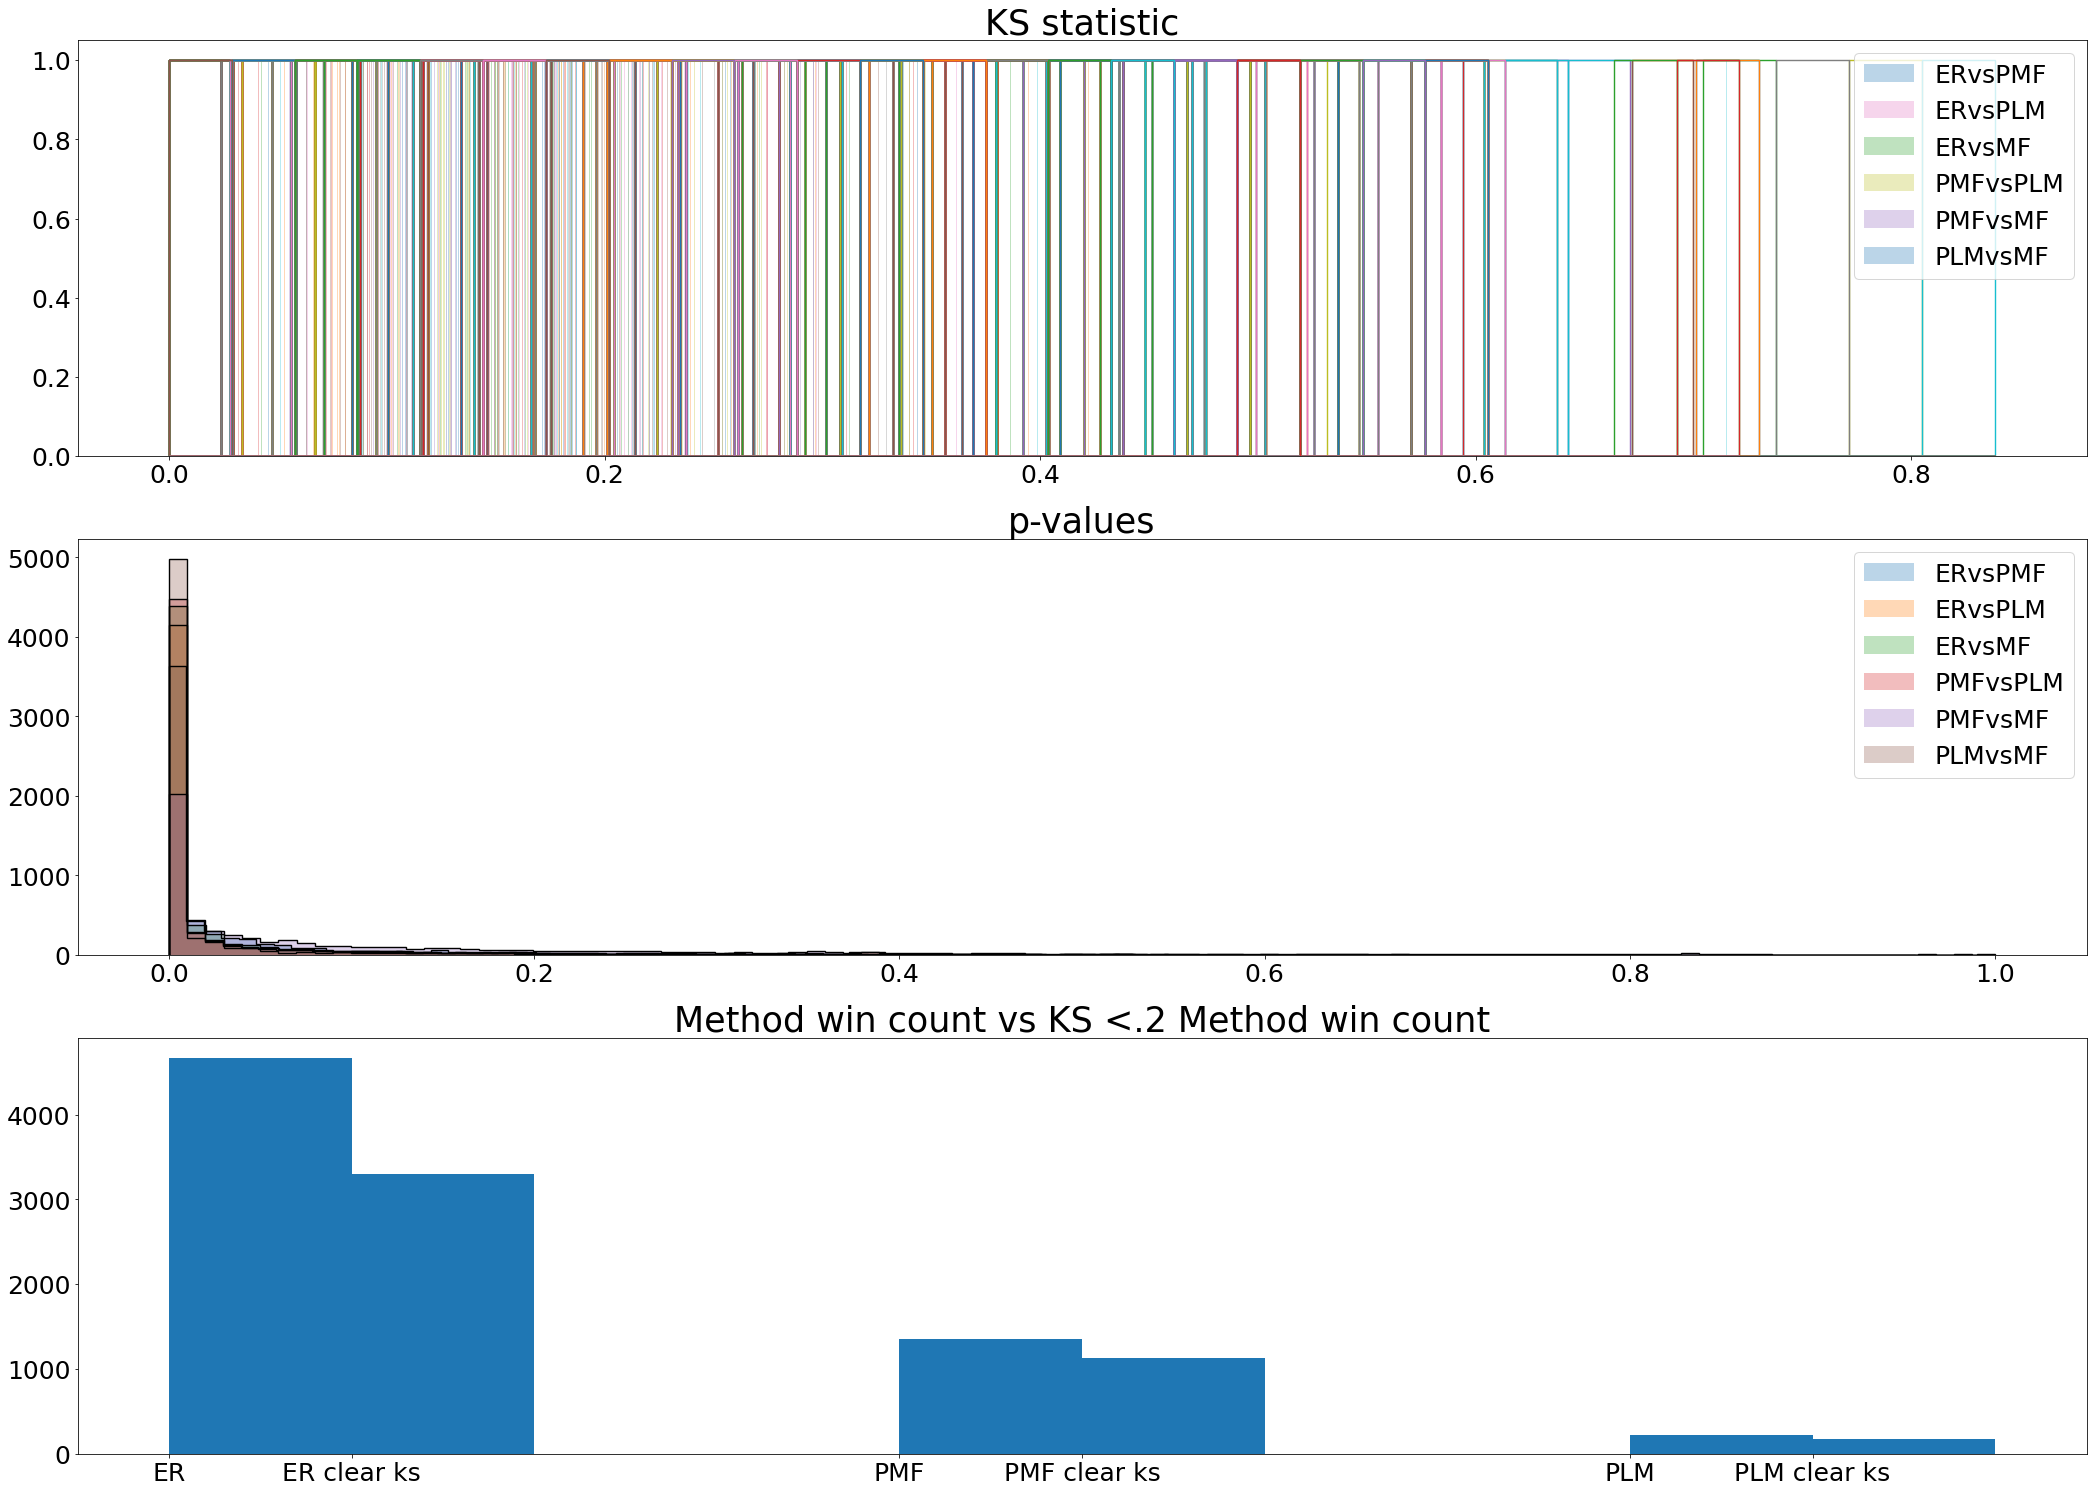

In [11]:
plt.figure(figsize=(36.0,26))
ax1=plt.subplot2grid((3,1), (0,0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((3,1), (1,0), colspan=1, rowspan=1)
ax3=plt.subplot2grid((3,1), (2,0), colspan=1, rowspan=1)


for ks_combo in ks_compares[0].keys():
    ax1.hist(ks_vals[ks_combo], bins=25, alpha=.3, label =ks_combo)  # density=False would make counts
    ax1.hist(ks_vals[ks_combo], bins=25, histtype='step', linewidth=1.4)  # density=False would make counts

    ax2.hist(p_vals[ks_combo], bins=100, alpha=.3, label =ks_combo)  # density=False would make counts
    ax2.hist(p_vals[ks_combo], bins=100, histtype='step', color='k', linewidth=1.4)  # density=False would make counts

ax1.legend(fontsize=25)
ax2.legend(fontsize=25)
ax1.set_title('KS statistic', fontsize = 35)
ax2.set_title('p-values', fontsize=35)

ax3.hist(max_auc_indices ,range=(0,2.5) )  # density=False would make counts
ax3.set_xticks([0,.25,1,1.25,2,2.25])
ax3.set_xticklabels(['ER', 'ER clear ks' , 'PMF', 'PMF clear ks', 'PLM', 'PLM clear ks'])
ax3.set_title('Method win count vs KS <.2 Method win count', fontsize=35)
plt.setp(ax1.get_xticklabels(),fontsize=25)
plt.setp(ax1.get_yticklabels(),fontsize=25)
plt.setp(ax2.get_xticklabels(),fontsize=25)
plt.setp(ax2.get_yticklabels(),fontsize=25)
plt.setp(ax3.get_xticklabels(),fontsize=25)
plt.setp(ax3.get_yticklabels(),fontsize=25)
plt.savefig('ks_comparison.pdf')
plt.show()

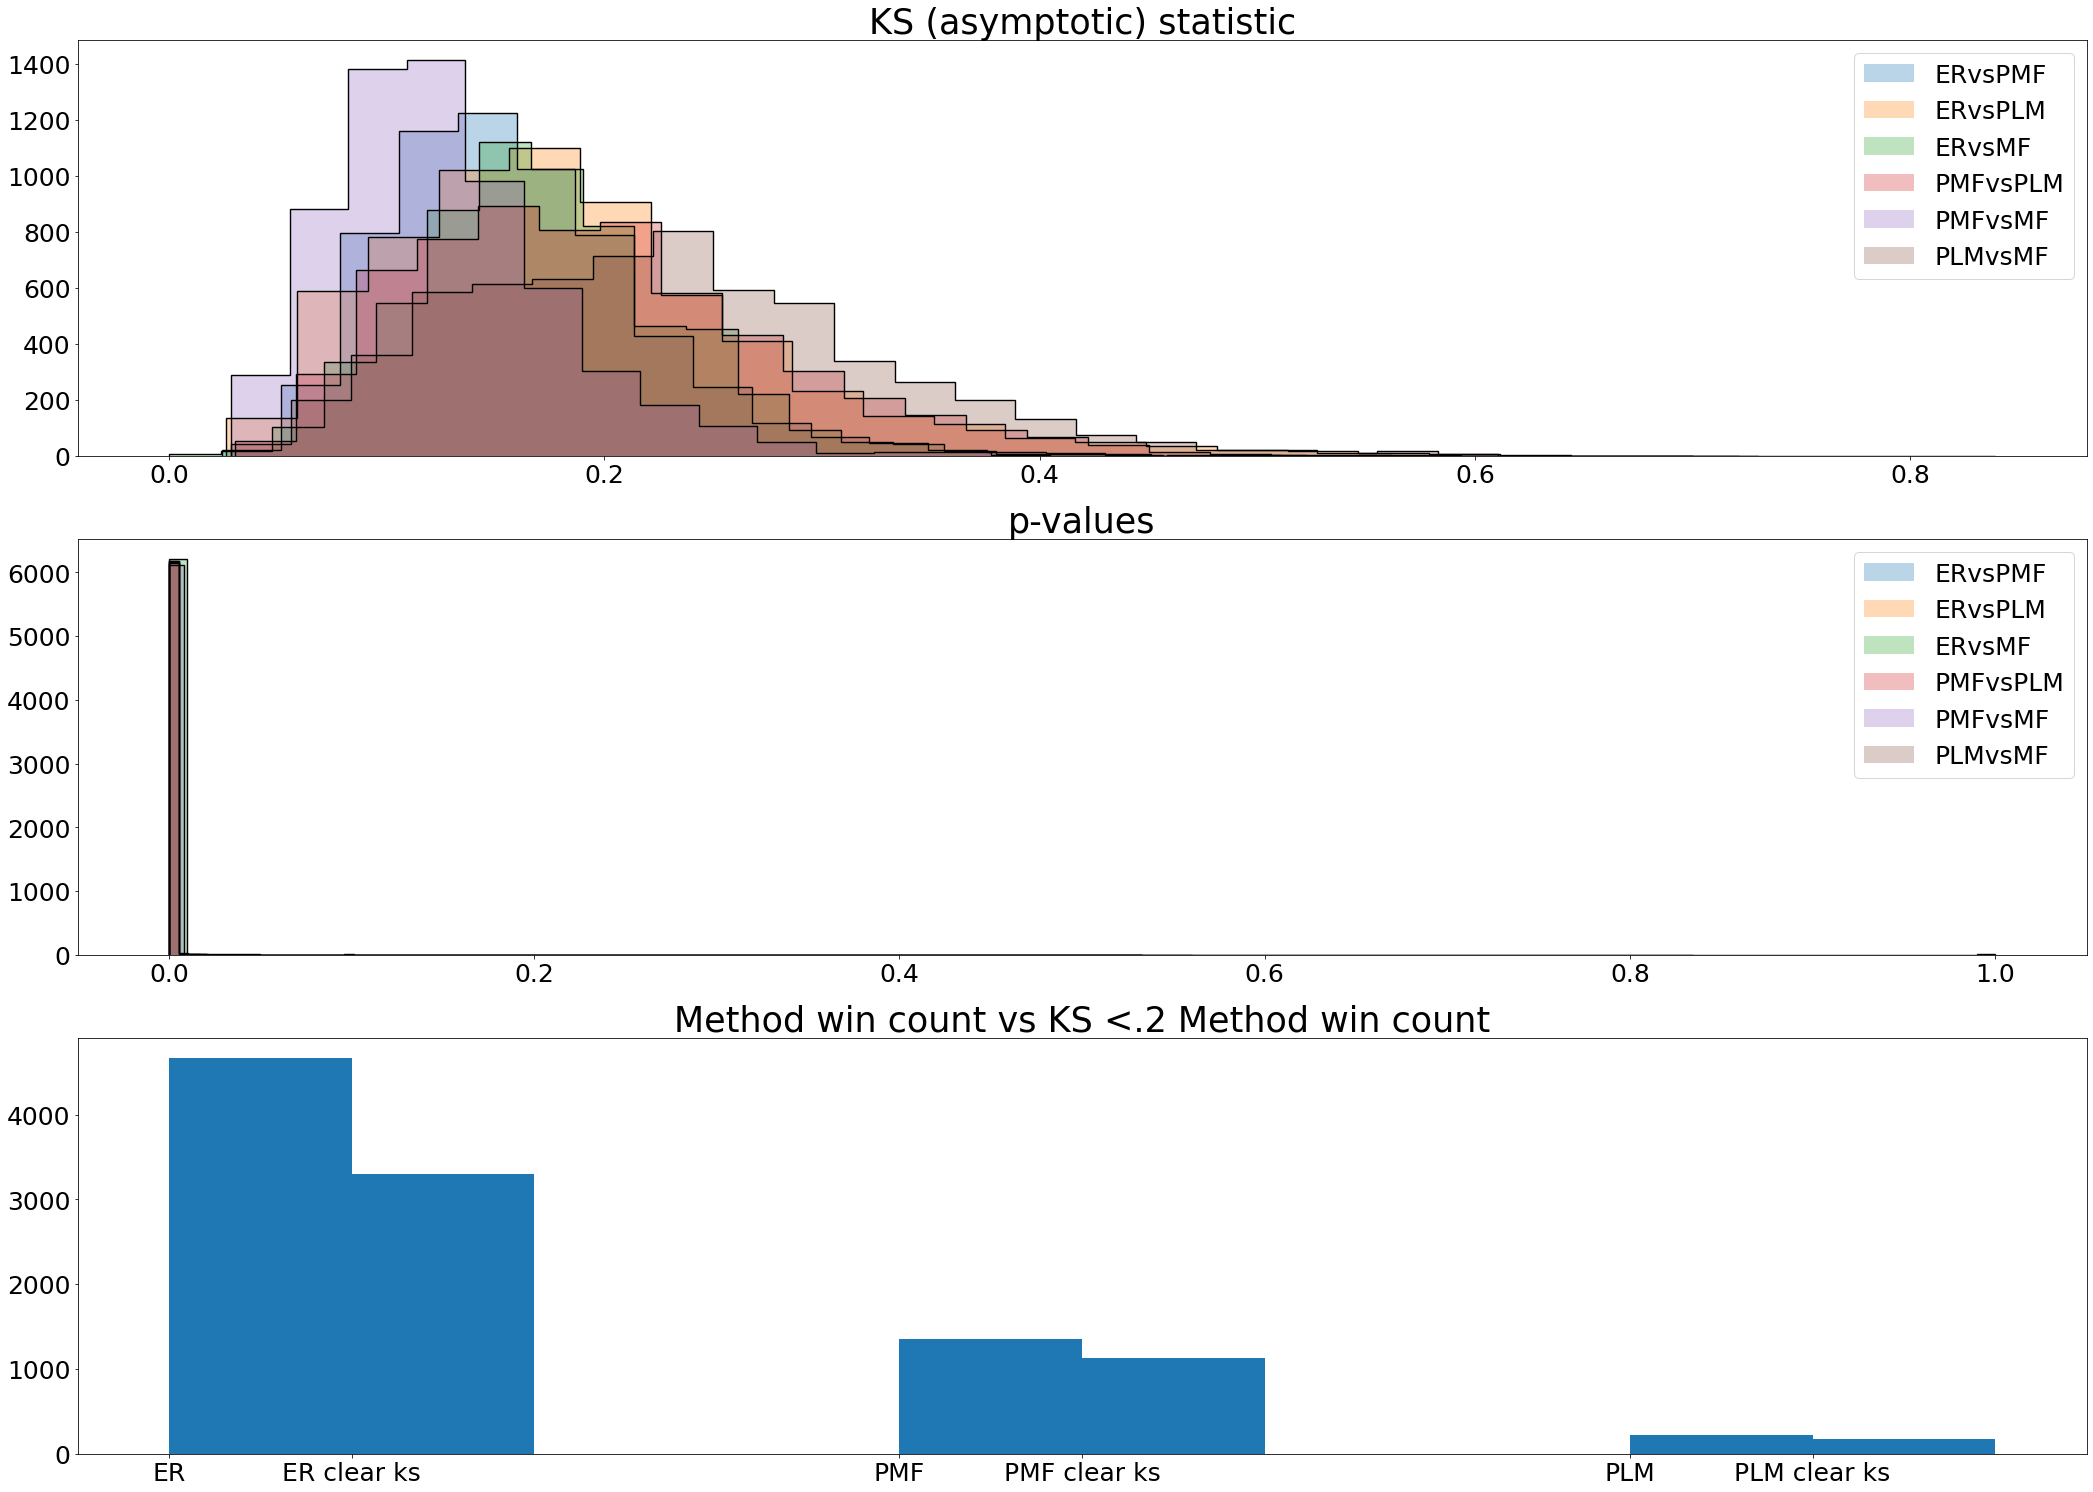

In [12]:
# asymptotic ks
plt.figure(figsize=(36.0,26))
ax1=plt.subplot2grid((3,1), (0,0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((3,1), (1,0), colspan=1, rowspan=1)
ax3=plt.subplot2grid((3,1), (2,0), colspan=1, rowspan=1)


for ks_combo in ks_compares[0].keys():
    ax1.hist(ks_vals_asympt[ks_combo], bins=25, alpha=.3, label =ks_combo, )  # density=False would make counts
    ax1.hist(ks_vals_asympt[ks_combo], bins=25, histtype='step', color='k', linewidth=1.4)  # density=False would make counts

    ax2.hist(p_vals_asympt[ks_combo], bins=100, alpha=.3, label =ks_combo, linewidth=1.4)  # density=False would make counts
    ax2.hist(p_vals_asympt[ks_combo], bins=100, histtype='step', color='k', linewidth=1.4)  # density=False would make counts

ax1.legend(fontsize=25)
ax2.legend(fontsize=25)
ax1.set_title('KS (asymptotic) statistic', fontsize = 35)
ax2.set_title('p-values', fontsize=35)

ax3.hist(max_auc_indices ,range=(0,2.5) )  # density=False would make counts
ax3.set_xticks([0,.25,1,1.25,2,2.25])
ax3.set_xticklabels(['ER', 'ER clear ks' , 'PMF', 'PMF clear ks', 'PLM', 'PLM clear ks'])
ax3.set_title('Method win count vs KS <.2 Method win count', fontsize=35)
plt.setp(ax1.get_xticklabels(),fontsize=25)
plt.setp(ax1.get_yticklabels(),fontsize=25)
plt.setp(ax2.get_xticklabels(),fontsize=25)
plt.setp(ax2.get_yticklabels(),fontsize=25)
plt.setp(ax3.get_xticklabels(),fontsize=25)
plt.setp(ax3.get_yticklabels(),fontsize=25)
plt.savefig('ks_asympt_comparison.pdf')
plt.show()

# Z-test Comparison

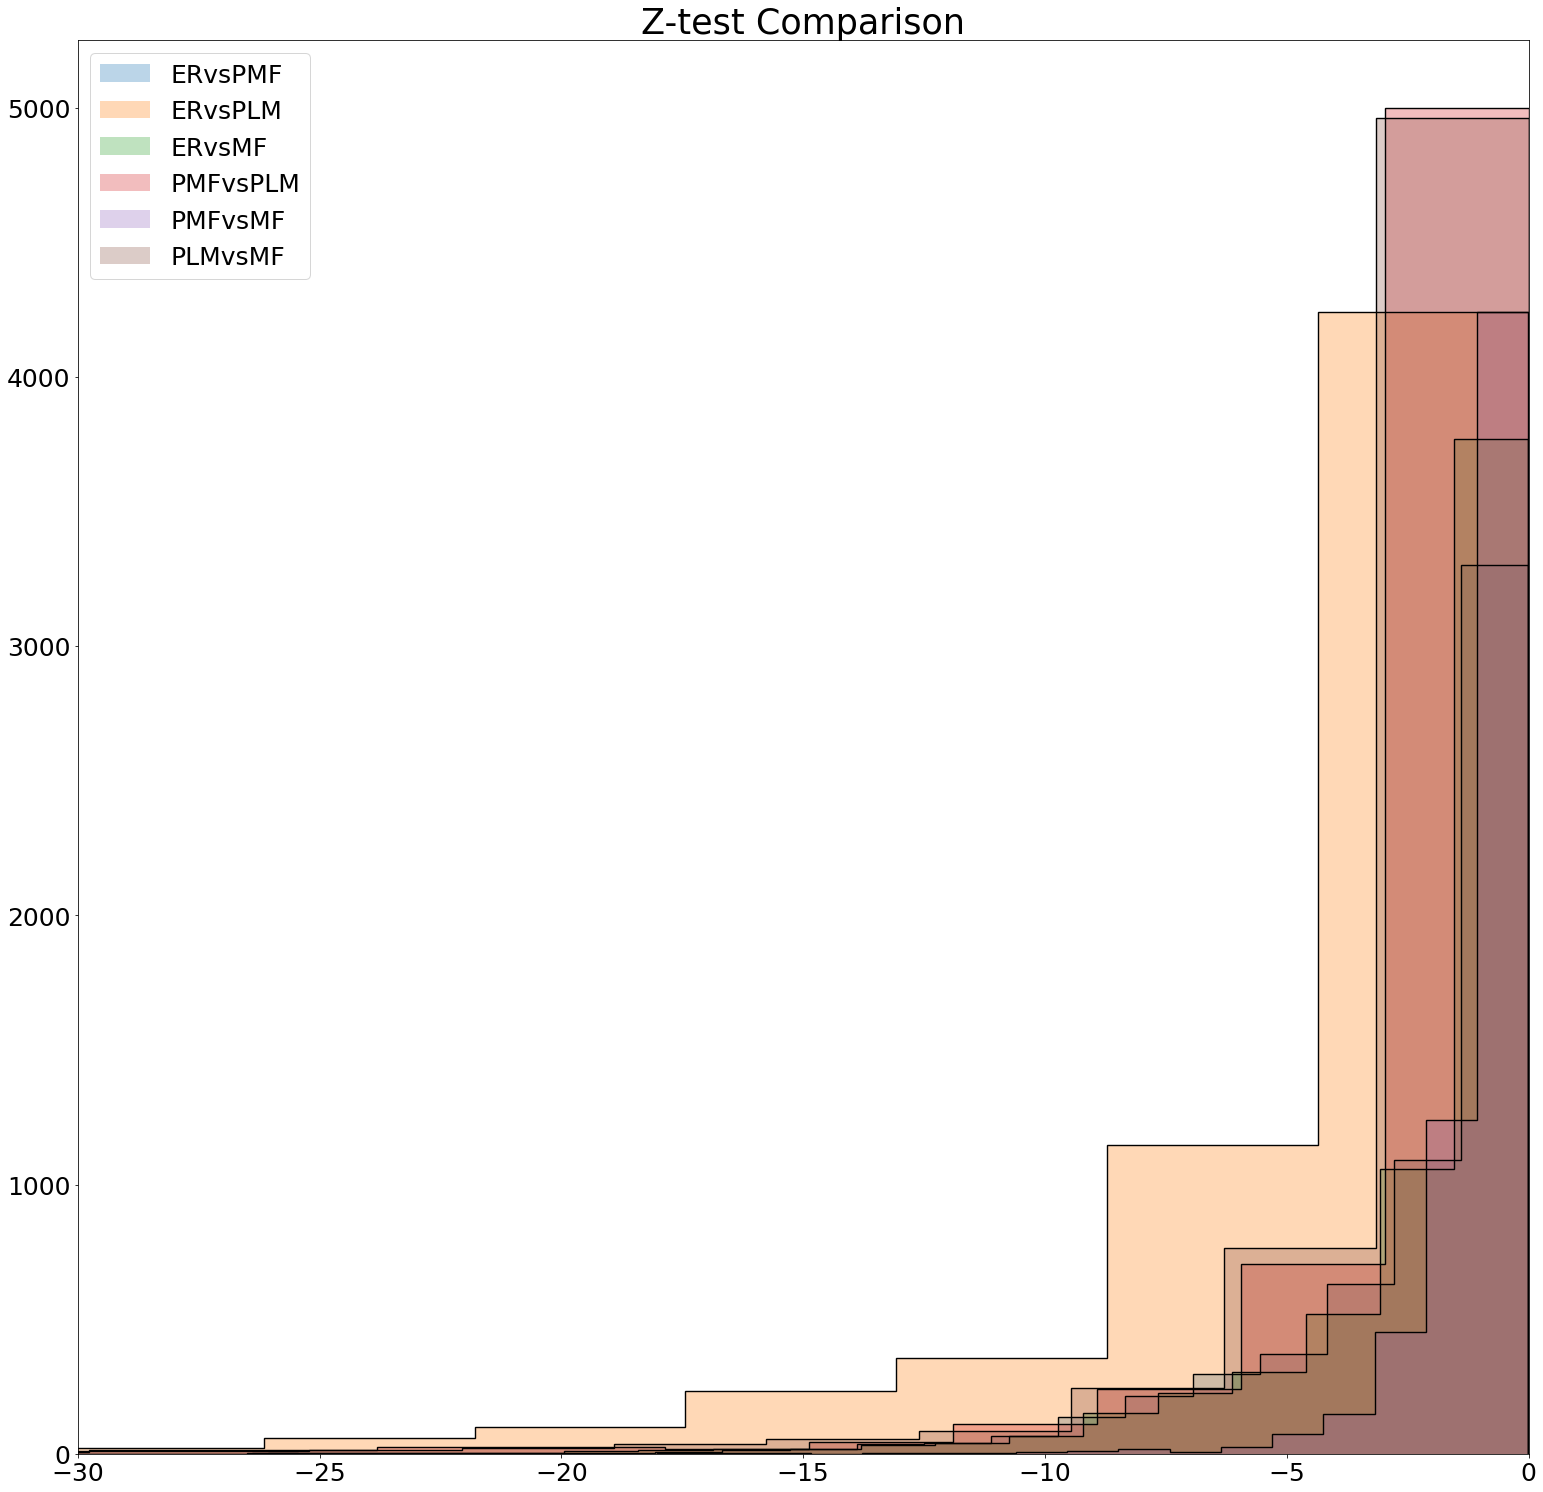

In [43]:
# plot best Method
z_lower = -2
for ks_combo in ks.keys():
    print(len(z[ks_combo]))
max_auc_indices_z = []
for i, er_auc in enumerate(method_aucs[0]):
    pmf_auc = method_aucs[1][i]
    plm_auc = method_aucs[2][i]
    auc_compare = [er_auc, pmf_auc, plm_auc]
    max_auc = max(auc_compare)
    max_auc_index = auc_compare.index(max_auc)
    max_auc_indices_z.append(max_auc_index)
    

    if max_auc_index == 0 and np.mean([z[ks_combo] for ks_combo in ks.keys() if '_MF' not in ks_combo and 'ER' in ks_combo]) < z_lower:
        max_auc_indices_z.append(.25)
    if max_auc_index == 1 and np.mean([z[ks_combo] for ks_combo in ks.keys() if '_MF' not in ks_combo and 'PMF' in ks_combo]) < z_lower:
        max_auc_indices_z.append(1.25)
    if max_auc_index == 2 and np.mean([z[ks_combo] for ks_combo in ks.keys() if '_MF' not in ks_combo and 'PLM' in ks_combo]) < z_lower:
        max_auc_indices_z.append(2.25)

print('ER has %d clear winners' % len([val for val in max_auc_indices_z if val == .25]))
print('PMF has %d clear winners' % len([val for val in max_auc_indices_z if val == 1.25]))
print('PLM has %d clear winners' % len([val for val in max_auc_indices_z if val == 2.25]))


6242
6242
6242
6242
6242
6242
ER has 4668 clear winners
PMF has 0 clear winners
PLM has 219 clear winners


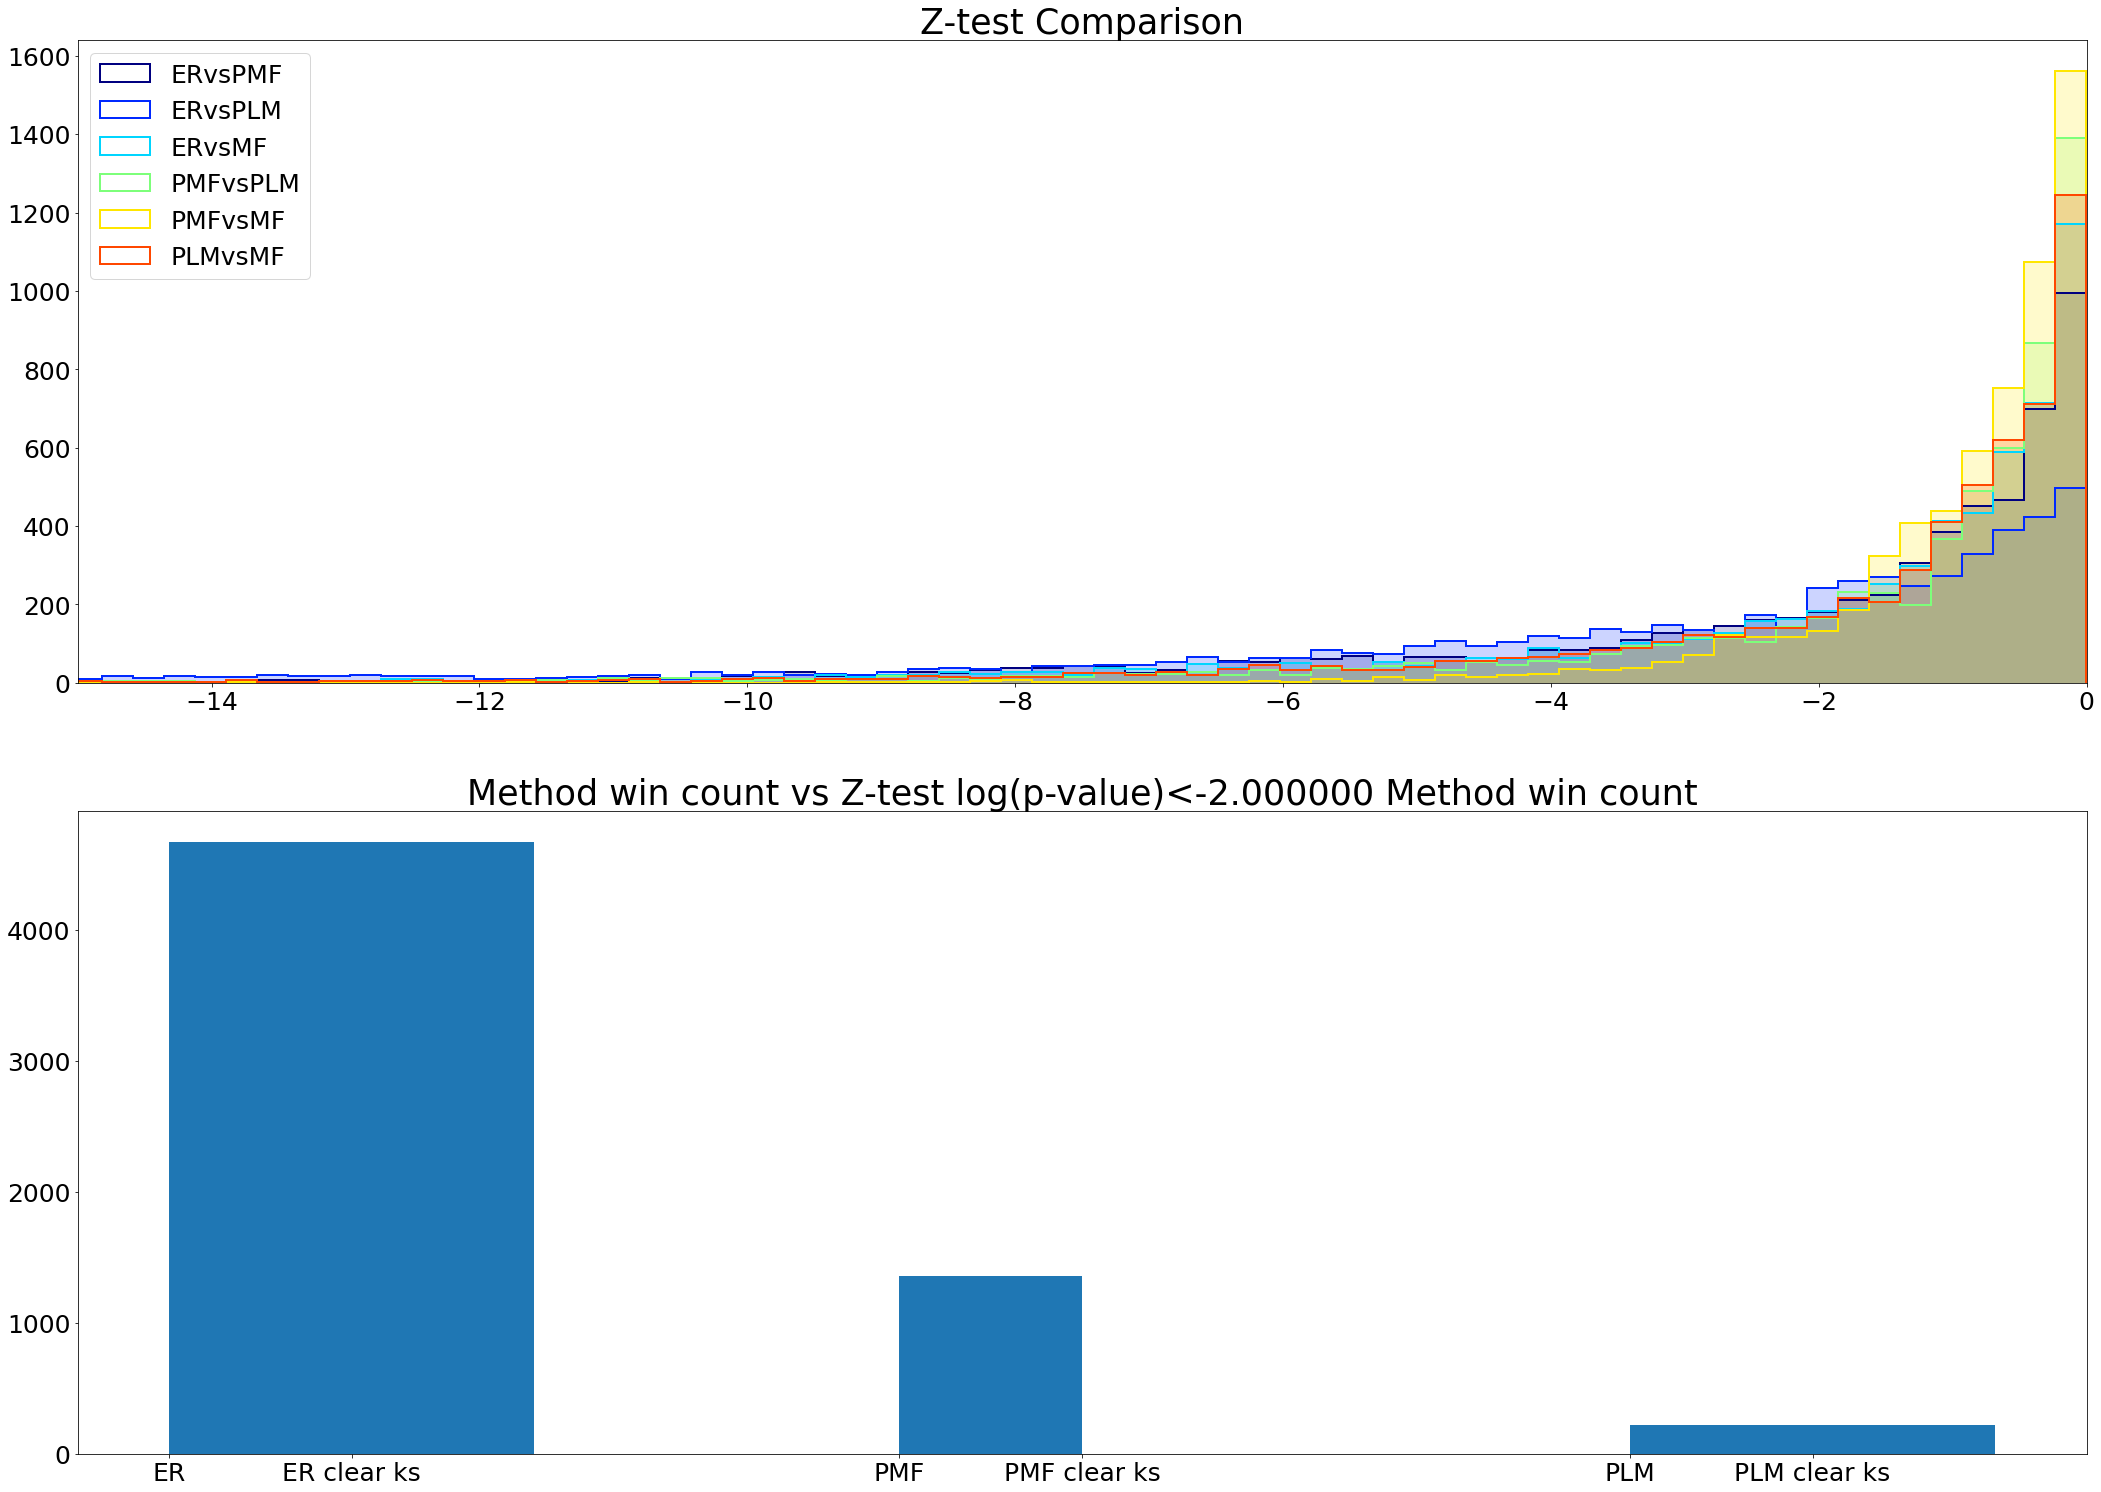

In [40]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
dark2 = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=len(ks_compares[0].keys()))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=dark2)
# asymptotic ks
# z-test comparison
plt.figure(figsize=(36.0,26))
ax1=plt.subplot2grid((2,1), (0,0), colspan=1, rowspan=1)


for i, ks_combo in enumerate(ks_compares[0].keys()):
    if i == 0:
        _, bins,_ = ax1.hist(z[ks_combo], bins=150, alpha=.2, color=scalarMap.to_rgba(i))  # density=False would make counts
        ax1.hist(z[ks_combo], bins=bins, histtype='step', color=scalarMap.to_rgba(i), linewidth=2, label =ks_combo, )  # density=False would make counts
    else:
        ax1.hist(z[ks_combo], bins=bins, alpha=.2, color=scalarMap.to_rgba(i) )  # density=False would make counts
        ax1.hist(z[ks_combo], bins=bins, histtype='step', color=scalarMap.to_rgba(i), linewidth=2, label =ks_combo, )  # density=False would make counts

  
        

ax1.legend(fontsize=25)
ax1.set_title('Z-test Comparison', fontsize = 35)

plt.setp(ax1.get_xticklabels(),fontsize=25)
plt.setp(ax1.get_yticklabels(),fontsize=25)

ax1.set_xlim((-15,0))

ax3=plt.subplot2grid((2,1), (1,0), colspan=1, rowspan=1)


ax3.hist(max_auc_indices_z ,range=(0,2.5) )  # density=False would make counts
ax3.set_xticks([0,.25,1,1.25,2,2.25])
ax3.set_xticklabels(['ER', 'ER clear ks' , 'PMF', 'PMF clear ks', 'PLM', 'PLM clear ks'])
ax3.set_title('Method win count vs Z-test log(p-value)<%f Method win count' % z_lower, fontsize=35)

plt.setp(ax3.get_xticklabels(),fontsize=25)
plt.setp(ax3.get_yticklabels(),fontsize=25)
plt.savefig('z_comparison.pdf')
plt.show()